In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import basedosdados as bd
import warnings
import missingno as msno
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('data/raw_brasileirao_serie_a.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8049 non-null   int64  
 1   data                            8049 non-null   object 
 2   rodada                          8049 non-null   int64  
 3   estadio                         8038 non-null   object 
 4   arbitro                         6339 non-null   object 
 5   publico                         6338 non-null   float64
 6   publico_max                     3789 non-null   float64
 7   time_mandante                   8049 non-null   object 
 8   time_visitante                  8049 non-null   object 
 9   tecnico_mandante                5896 non-null   object 
 10  tecnico_visitante               5896 non-null   object 
 11  colocacao_mandante              6339 non-null   float64
 12  colocacao_visitante             63

In [4]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df['ano_campeonato'] = pd.to_datetime(df['ano_campeonato'], format='%Y')

In [5]:
man_columns = [c for c in df.columns if 'mandante' in c]
vis_columns = [c for c in df.columns if 'visitante' in c]

for col in man_columns:
    df.rename(columns={col: col.replace('mandante','man')},inplace=True)

for col in vis_columns:
    df.rename(columns={col: col.replace('visitante','vis')},inplace=True)

In [6]:
times = sorted(list(set(df['time_man'].unique().tolist() + df['time_vis'].unique().tolist())))
times

['América-MG',
 'América-RN',
 'Athletico-PR',
 'Atlético-GO',
 'Atlético-MG',
 'Atlético-PR',
 'Avaí FC',
 'Barueri',
 'Botafogo',
 'Brasiliense-DF',
 'CSA',
 'Ceará SC',
 'Chapecoense',
 'Corinthians',
 'Coritiba FC',
 'Criciúma EC',
 'Cruzeiro',
 'Cuiabá-MT',
 'EC Bahia',
 'EC Vitória',
 'Figueirense FC',
 'Flamengo',
 'Fluminense',
 'Fortaleza',
 'Goiás',
 'Goiás EC',
 'Grêmio',
 'Guarani',
 'Internacional',
 'Ipatinga FC',
 'Joinville-SC',
 'Juventude',
 'Náutico',
 'Palmeiras',
 'Paraná',
 'Paysandu SC',
 'Ponte Preta',
 'Portuguesa',
 'RB Bragantino',
 'Santa Cruz',
 'Santo André',
 'Santos',
 'Santos FC',
 'Sport Recife',
 'São Caetano',
 'São Paulo',
 'Vasco da Gama']

Atlético PR, Santos e Goiás aparecem com dois nomes diferentes. Vamos renomeá-los para permanecer o mesmo

In [7]:
df.loc[(df['time_man'] == 'Athletico-PR'), 'time_man'] = 'Atlético-PR'
df.loc[(df['time_vis'] == 'Athletico-PR'), 'time_vis'] = 'Atlético-PR'

df.loc[(df['time_man'] == 'Santos FC'), 'time_man'] = 'Santos'
df.loc[(df['time_vis'] == 'Santos FC'), 'time_vis'] = 'Santos'

df.loc[(df['time_man'] == 'Goiás EC'), 'time_man'] = 'Goiás'
df.loc[(df['time_vis'] == 'Goiás EC'), 'time_vis'] = 'Goiás'

In [8]:
df['vitoria_man'] = np.nan

df.loc[(df['gols_man'] > df['gols_vis']), 'vitoria_man'] = 1
df.loc[(df['gols_man'] < df['gols_vis']), 'vitoria_man'] = -1
df.loc[(df['gols_man'] == df['gols_vis']), 'vitoria_man'] = 0

df['gols_partida'] = df['gols_man'] + df['gols_vis']

### Evolução temporal

- #### Qual ano teve mais jogos?

In [9]:
df['ano_campeonato'].value_counts().sort_index()

ano_campeonato
2003-01-01    456
2004-01-01    456
2005-01-01    418
2006-01-01    380
2007-01-01    380
2008-01-01    380
2009-01-01    380
2010-01-01    380
2011-01-01    380
2012-01-01    380
2013-01-01    380
2014-01-01    380
2015-01-01    380
2016-01-01    380
2017-01-01    380
2018-01-01    380
2019-01-01    380
2020-01-01    380
2021-01-01    380
2022-01-01    380
2023-01-01    259
Name: count, dtype: int64

O ano que mais tiveram jogos pelo Brasileirao foram os anos de 2003 e 2004 com 456 jogos.

- #### Como se comporta o publico ao longo dos anos?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


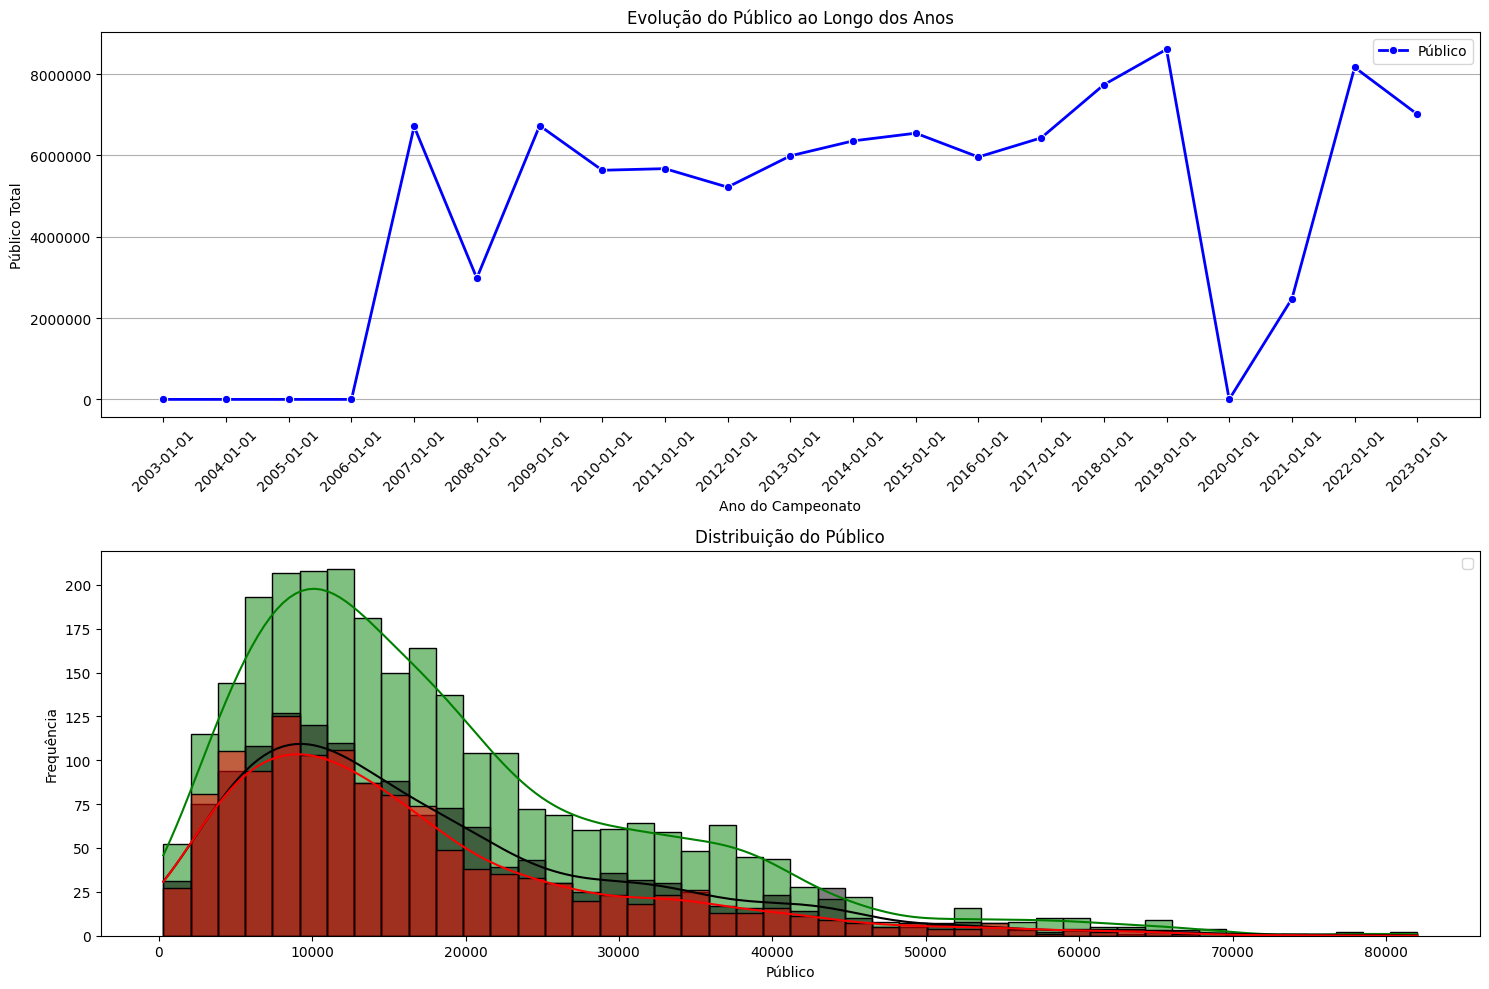

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.lineplot(data=df.groupby('ano_campeonato', as_index=False)['publico'].sum(), 
             y='publico', 
             x='ano_campeonato',
             marker='o',
             linewidth=2,
             color='blue', 
             label='Público',
             ax=axs[0])

axs[0].set_xlabel('Ano do Campeonato')
axs[0].set_ylabel('Público Total')
axs[0].set_title('Evolução do Público ao Longo dos Anos')
axs[0].set_xticks(df['ano_campeonato'].unique())
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()
axs[0].ticklabel_format(style='plain', axis='y')
axs[0].grid(axis='y')


cores_personalizadas = {-1: 'red', 0: 'black', 1: 'green'}
sns.histplot(df[df['publico'] > 0], 
             x='publico', 
             hue='vitoria_man', 
             kde=True, 
             alpha=0.5, 
             palette=cores_personalizadas,
             ax=axs[1])

axs[1].set_title('Distribuição do Público')
axs[1].set_xlabel('Público')
axs[1].set_ylabel('Frequência')
axs[1].legend()

plt.tight_layout()
plt.show()

Aparentemente há uma divergencia nos dados de publico para o ano de 2008, onde há uma grande quantidade de zeros.

A partir de 2016, observa-se uma crescen no publico presente nos estádios. No entanto, o efeito da pandemia do Covid-19 no ano de 2020 impediu este avanço fazendo com que os jogos fossem fechados ao publico.

--

Os públicos agrupados por vitorias, empates e derrotas do tima mandante tem distribuições parecidas. No entanto, a frequência é bem maior quando o time mandante vence.
Com isso pode-se concluir, por exemplo, que um jogo em que o time mandante tem mais vantagem normalmente é mais populado pela torcida mandante.

- #### Como se comporta a média de gols por rodada ao longo do tempo?

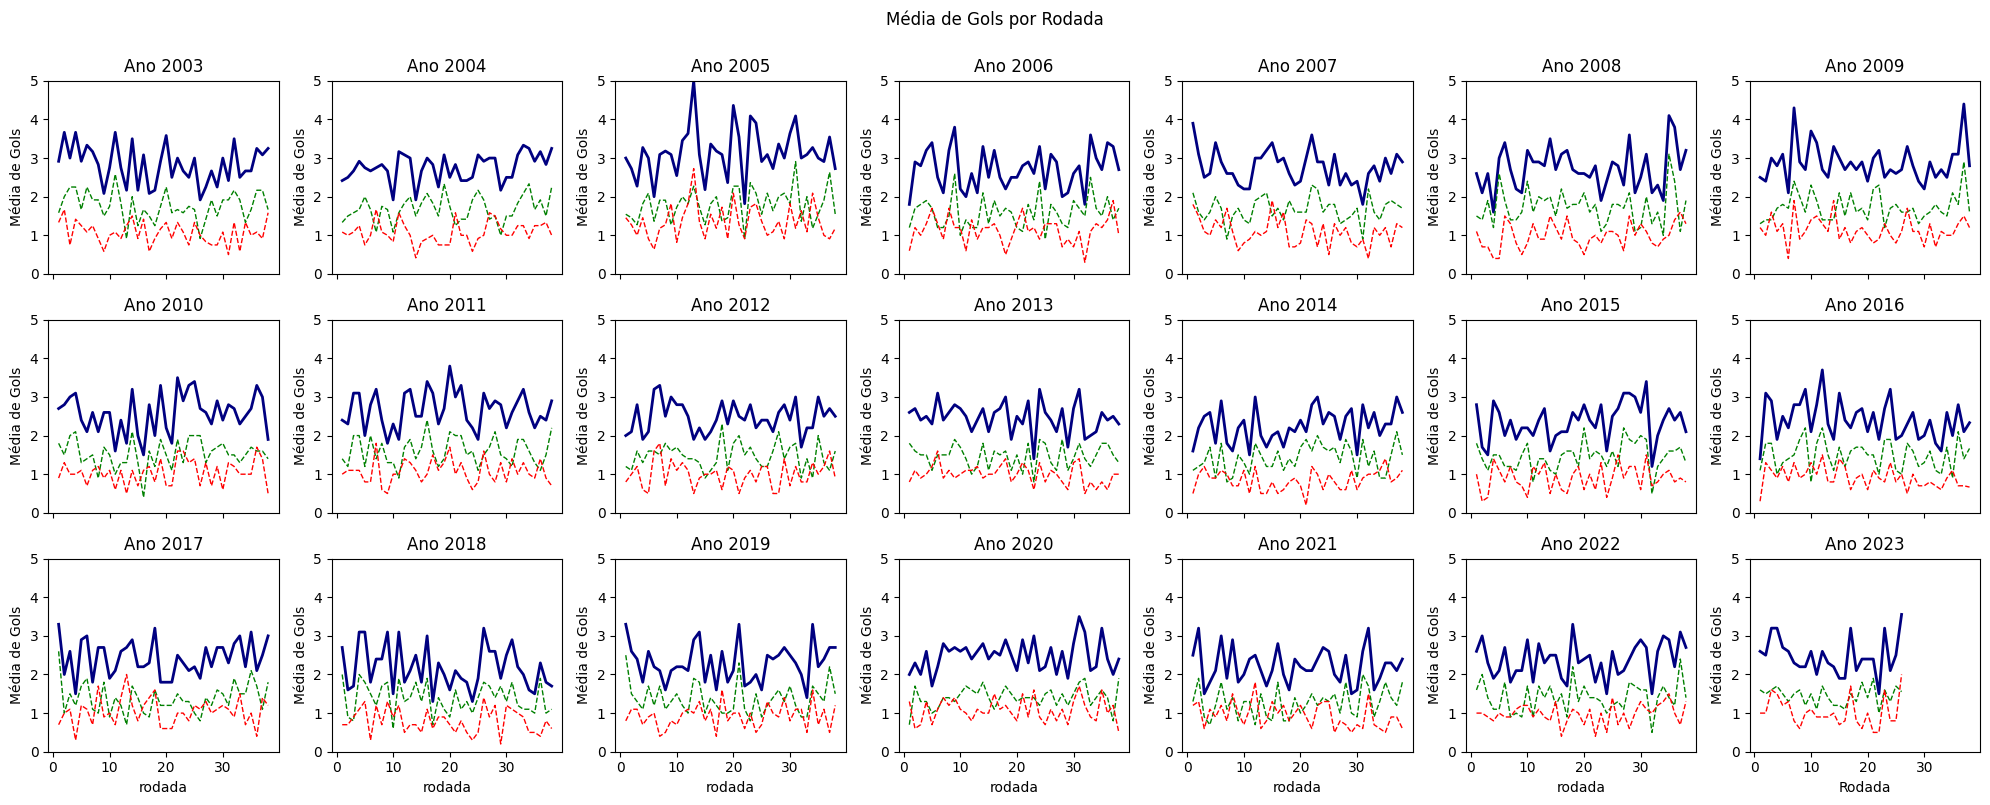

In [13]:
aux = df.groupby(['ano_campeonato','rodada'], as_index=False)[['gols_partida', 'gols_man', 'gols_vis']].mean()
aux['ano_campeonato'] = aux['ano_campeonato'].dt.year
anos = np.sort(aux['ano_campeonato'].unique())

fig, axs = plt.subplots(nrows=3, ncols=7, figsize=(20, 8), sharex=True)

for i, ano in enumerate(anos):
    dados_ano = aux[aux['ano_campeonato'] == ano]
    
    
    linha, coluna = divmod(i, 7) #3x7
    
    sns.lineplot(data=dados_ano, x='rodada', y='gols_partida',  ax=axs[linha, coluna], linewidth=2, color='navy') 
    sns.lineplot(data=dados_ano, x='rodada', y='gols_man',  ax=axs[linha, coluna], linewidth=1, color='green', linestyle='--') 
    sns.lineplot(data=dados_ano, x='rodada', y='gols_vis',  ax=axs[linha, coluna], linewidth=1, color='red', linestyle='--')
    
    axs[linha, coluna].set_ylim([0,5])    
    axs[linha, coluna].set_title(f'Ano {ano}')
    axs[linha, coluna].set_ylabel('Média de Gols')    
    

plt.xlabel('Rodada')
plt.suptitle('Média de Gols por Rodada', y=1)
plt.tight_layout()
plt.show()

del aux

Oberva-se que os gols ao longo das rodadas do campeonato nao seguem um padrão específico mostrando muitas vezes valores discrepantes. No entanto, nota-se que no ano de 2005 há uma maior variação nos gols marcados. 

Para os anos de 2003,2004,2007,2014 e 2017 tem-se uma tendência de aumento nos gols marcados nas ultimas rodadas do campeonato.

Normalmente os times mandantes (linha tracejada em verde) faz mais gols, em média, do que os times visitantes (linha tracejada vermelha)

In [14]:
# Dados a partir de 2018
df = df[df['ano_campeonato'].dt.year>=2018]

In [15]:
df.columns

Index(['ano_campeonato', 'data', 'rodada', 'estadio', 'arbitro', 'publico',
       'publico_max', 'time_man', 'time_vis', 'tecnico_man', 'tecnico_vis',
       'colocacao_man', 'colocacao_vis', 'valor_equipe_titular_man',
       'valor_equipe_titular_vis', 'idade_media_titular_man',
       'idade_media_titular_vis', 'gols_man', 'gols_vis', 'gols_1_tempo_man',
       'gols_1_tempo_vis', 'escanteios_man', 'escanteios_vis', 'faltas_man',
       'faltas_vis', 'chutes_bola_parada_man', 'chutes_bola_parada_vis',
       'defesas_man', 'defesas_vis', 'impedimentos_man', 'impedimentos_vis',
       'chutes_man', 'chutes_vis', 'chutes_fora_man', 'chutes_fora_vis',
       'vitoria_man', 'gols_partida'],
      dtype='object')

Uma rápida olhada nos dados numéricos:

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ano_campeonato,2159,2020-05-11 19:57:13.256136960,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,2022-01-01 00:00:00,2023-01-01 00:00:00,NaN
data,2159,2021-01-09 07:54:53.191292160,2018-04-14 00:00:00,2019-08-31 00:00:00,2021-01-29 00:00:00,2022-06-10 00:00:00,2023-10-08 00:00:00,NaN
rodada,2159.0,18.774433,1.0,9.5,18.0,28.0,38.0,10.790815
publico,2159.0,15746.292265,0.0,0.0,11087.0,25488.5,69997.0,16291.694436
publico_max,2145.0,44837.638228,5000.0,24584.0,46931.0,60326.0,82584.0,19956.639225
colocacao_man,2159.0,10.577582,1.0,6.0,11.0,16.0,20.0,5.778133
colocacao_vis,2159.0,10.421028,1.0,5.0,10.0,15.0,20.0,5.758432
valor_equipe_titular_man,2136.0,20618743.389045,560.0,7472500.0,13450000.0,29950000.0,100500000.0,18908069.153621
valor_equipe_titular_vis,2136.0,19731112.598783,593.0,7350000.0,13050000.0,28475000.0,96000000.0,17955865.035571
idade_media_titular_man,2136.0,58.425562,20.4,26.9,28.1,29.5,324.0,82.735726


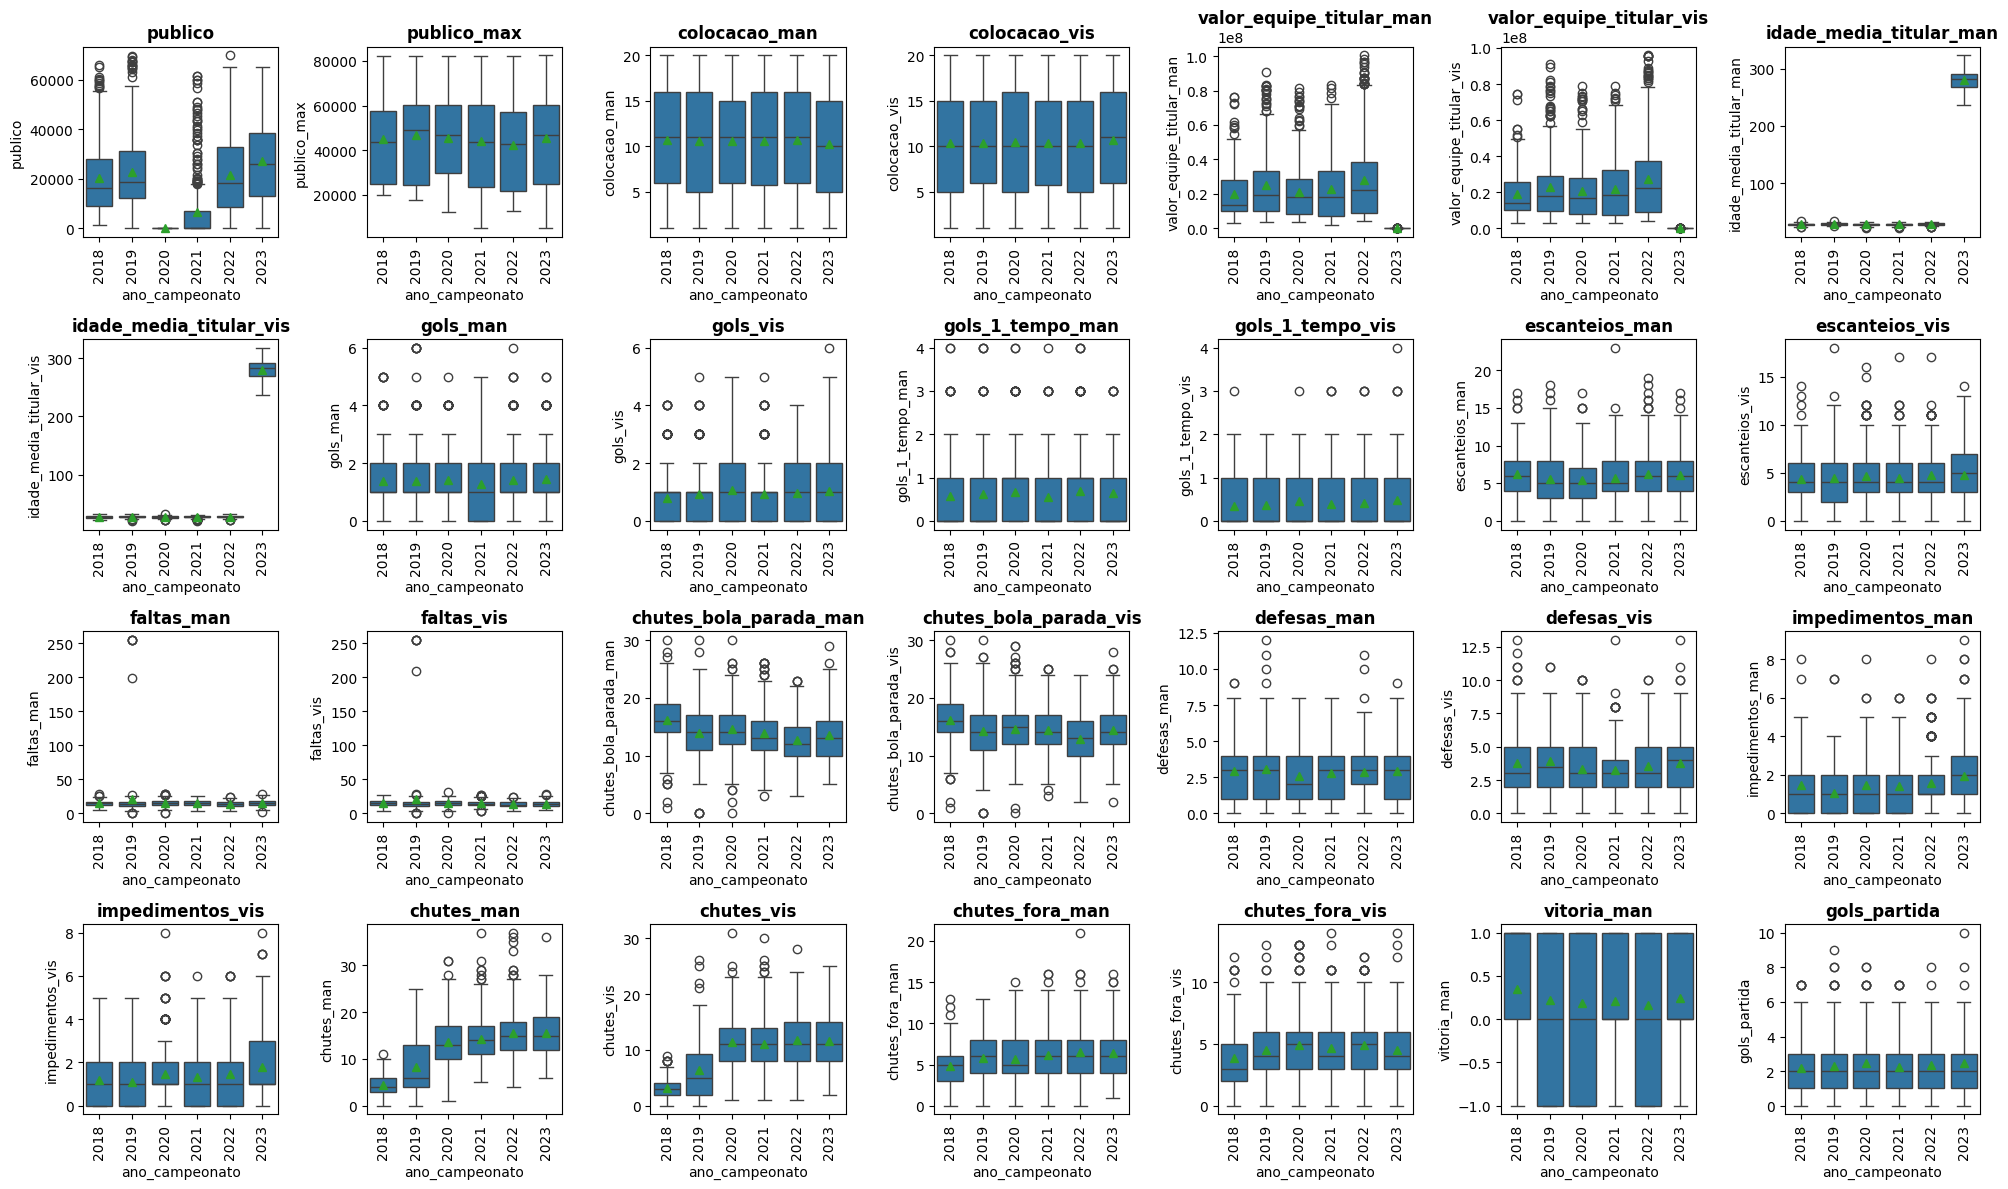

In [20]:
v_num = ['publico', 'publico_max',  'colocacao_man', 'colocacao_vis', 'valor_equipe_titular_man',
       'valor_equipe_titular_vis', 'idade_media_titular_man',
       'idade_media_titular_vis', 'gols_man', 'gols_vis', 'gols_1_tempo_man',
       'gols_1_tempo_vis', 'escanteios_man', 'escanteios_vis', 'faltas_man',
       'faltas_vis', 'chutes_bola_parada_man', 'chutes_bola_parada_vis',
       'defesas_man', 'defesas_vis', 'impedimentos_man', 'impedimentos_vis',
       'chutes_man', 'chutes_vis', 'chutes_fora_man', 'chutes_fora_vis',
       'vitoria_man', 'gols_partida']

fig, axs = plt.subplots(nrows=4, ncols=7, figsize=(20, 12))

for i, var_num in enumerate(v_num):    
    
    
    linha, coluna = divmod(i, 7) #4x7

    data = df[['ano_campeonato', var_num]].sort_values(by='ano_campeonato')
    data['ano_campeonato'] = data['ano_campeonato'].dt.year.astype(str)

    sns.boxplot(data=data, x='ano_campeonato', y=var_num, ax=axs[linha, coluna], showmeans=True)   
    
    axs[linha, coluna].set_title(f'{var_num}', fontweight='bold')
    axs[linha, coluna].set_xticklabels(data['ano_campeonato'].unique(), rotation=90)
       
plt.tight_layout()
plt.show()

-   Podemos observar que existe certa divergência nos dados relacionados à idade media do time titular e visitante. Vamos observar como esses dados estao distribuidos no tempo e decidir uma abordagem para contornar tal problema.

-   Também observamos que existe uma anomalia nos dados de valor equipe titular mandante e visitante, onde os dados para 2023 estão zerados. 

-    Há uma mudança de patamar no que diz respeitos aos chutes mandante e visitante.

Verificação nas idades media titular mandante e visitante

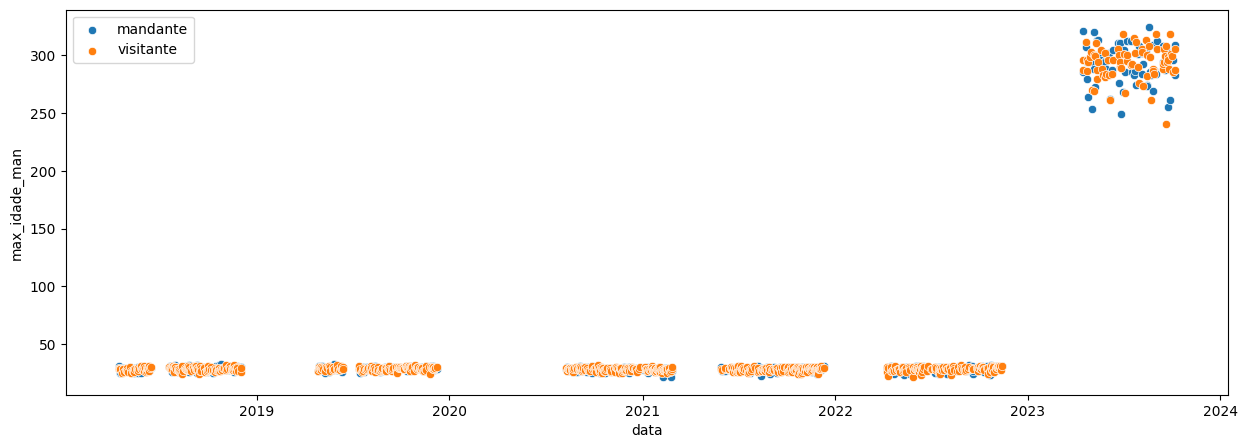

In [21]:
aux = df.groupby('data',as_index=False).agg(max_idade_man=('idade_media_titular_man','max'),
                                            max_idade_vis=('idade_media_titular_vis','max')
                                            )
plt.figure(figsize=(15,5))
sns.scatterplot(data=aux, x='data',y='max_idade_man',label='mandante')
sns.scatterplot(data=aux, x='data',y='max_idade_vis',label='visitante')

plt.show()

O problema se inicia no ano de 2023 e pode estar relacionado a algum erro de digitação (por exemplo, idade * 10). Vamos observar agora como seria a distribuição caso dividíssemos o valor por 10. Para isso, vamos olhar apenas 2022 e 2023

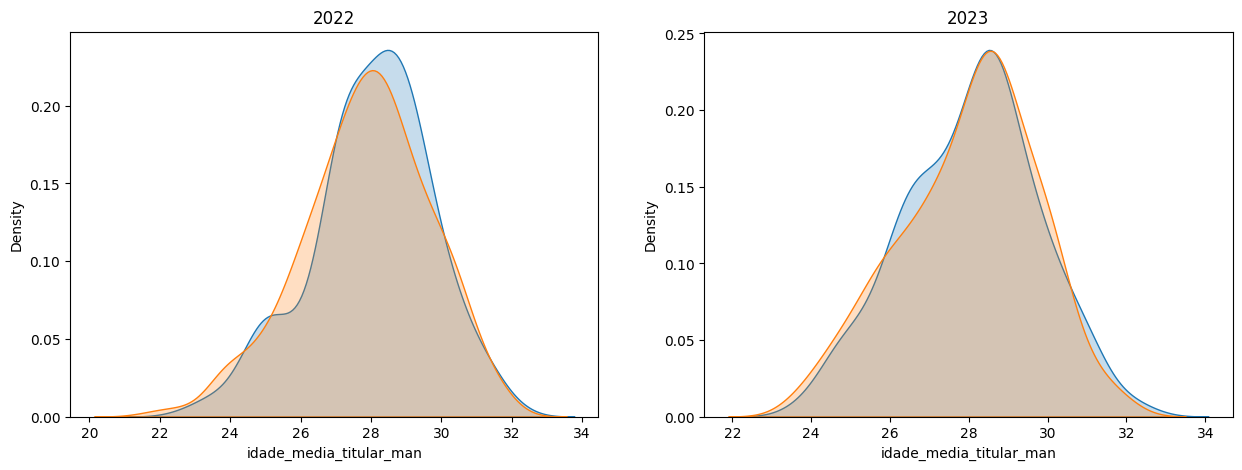

In [22]:
aux = df.copy()

aux_2022 = aux[aux['ano_campeonato'].dt.year==2022]
aux_2023 = aux[aux['ano_campeonato'].dt.year==2023]
aux_2023['idade_media_titular_man'] = aux_2023['idade_media_titular_man']/10
aux_2023['idade_media_titular_vis'] = aux_2023['idade_media_titular_vis']/10

fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.kdeplot(data=aux_2022, x='idade_media_titular_man',label='mandante', fill=True, ax=axs[0])
sns.kdeplot(data=aux_2022, x='idade_media_titular_vis',label='visitante',fill=True, ax=axs[0])
axs[0].set_title('2022')

sns.kdeplot(data=aux_2023, x='idade_media_titular_man',label='mandante',fill=True, ax=axs[1])
sns.kdeplot(data=aux_2023, x='idade_media_titular_vis',label='visitante',fill=True, ax=axs[1])
axs[1].set_title('2023')


plt.show()

In [23]:
from scipy.stats import ks_2samp

def ks_test(df1,df2,var1,var2):
    s1 = df1[var1]
    s2 = df2[var2]

    ks_val, p_value = ks_2samp(s1,s2)
    print(f'{var1} x {var2}:')
    print(f'\tks: {ks_val}')
    print(f'\tp_value: {p_value}')

    if p_value > 0.05:
        print('As distribuições são estatisticamente parecidas')
    else:
        print('As distribuições NÃO são estatisticamente parecidas')

ks_test(aux_2022, aux_2023,'idade_media_titular_man','idade_media_titular_man')
ks_test(aux_2022, aux_2023,'idade_media_titular_vis','idade_media_titular_vis')

idade_media_titular_man x idade_media_titular_man:
	ks: 0.05728510465352571
	p_value: 0.6648702967703334
As distribuições são estatisticamente parecidas
idade_media_titular_vis x idade_media_titular_vis:
	ks: 0.07984149563096932
	p_value: 0.2617445972749839
As distribuições são estatisticamente parecidas


In [24]:
del aux, aux_2022, aux_2023

Após analise da comparação da distribuição de idades entre os anos de 2022 e 2023 (este dividido por 10) e do teste estatístico de Kolmogorov-Smirnov, concluimos que as amostras possuem distribuições parecidas, entao vamos assumir o erro de digitação dos dados e atribuir como a idade de 2023 como sendo idade=10

In [25]:
df.loc[df['ano_campeonato'].dt.year==2023, 'idade_media_titular_man'] = df['idade_media_titular_man']/10
df.loc[df['ano_campeonato'].dt.year==2023, 'idade_media_titular_vis'] = df['idade_media_titular_vis']/10

In [26]:
data = df.copy() # Criando copia para nao modificar o dataframe a partir de 2018

### As analises abaixo levam em consideração dados a partir de 2022

- #### Qual estádio teve mais jogos em quantidate?
- #### Qual estádio teve o melhor aproveitamento do time mandante?
- #### Qual estádio teve o pior aproveitamento do time mandante?

In [27]:
df = data[data['ano_campeonato'].dt.year>=2022]

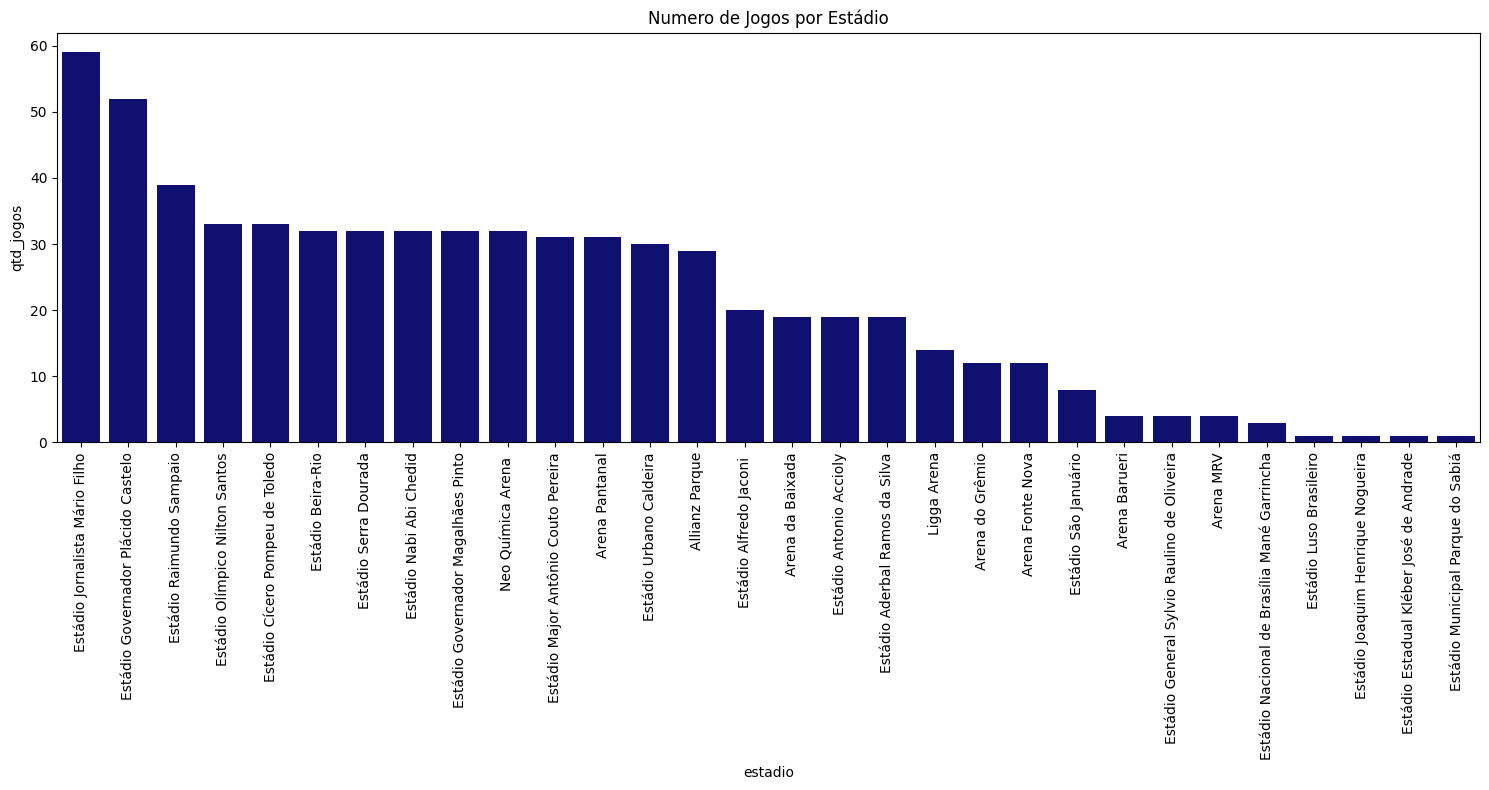

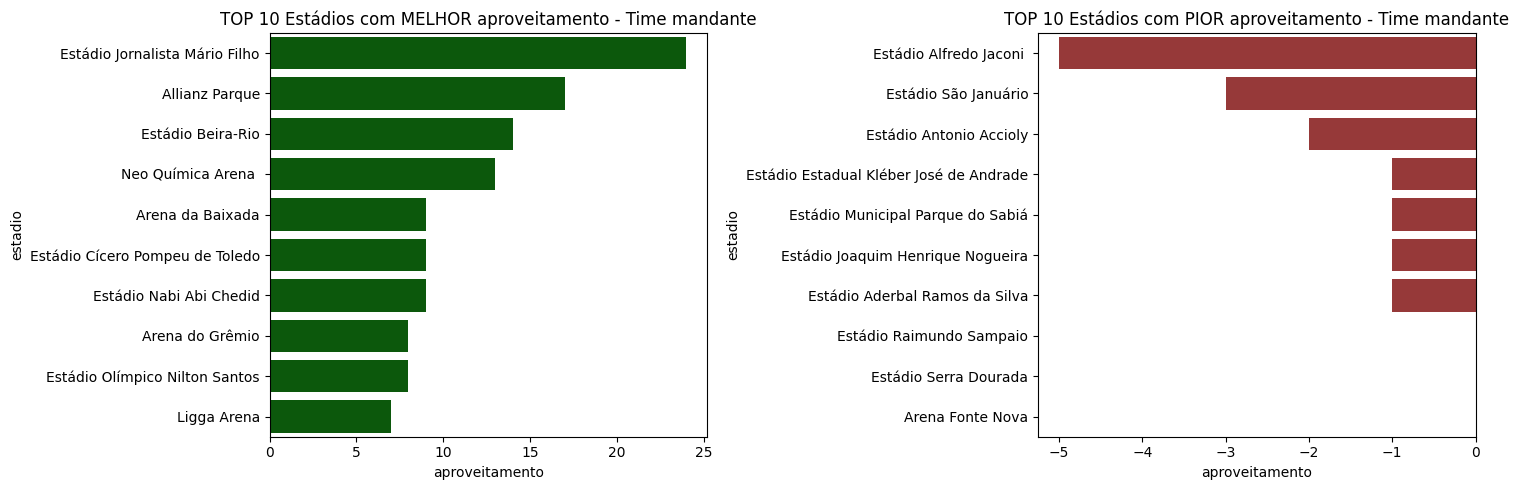

In [28]:
aux = df.groupby(['estadio'], as_index=False).agg(qtd_jogos=('estadio','count'),
                                                  aproveitamento=('vitoria_man','sum'))

plt.figure(figsize=(15,8))

sns.barplot(data=aux.sort_values(by='qtd_jogos',ascending=False), 
            x='estadio', 
            y='qtd_jogos', 
            color='navy').set_title('Numero de Jogos por Estádio')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.barplot(data=aux.sort_values(by='aproveitamento', ascending=False)[:10],
             x='aproveitamento', 
             y='estadio',
             ax=axes[0],              
             color='darkgreen').set_title('TOP 10 Estádios com MELHOR aproveitamento - Time mandante')

sns.barplot(data=aux.sort_values(by='aproveitamento', ascending=True)[:10],
             x='aproveitamento', 
             y='estadio',
             ax=axes[1],              
             color='brown').set_title('TOP 10 Estádios com PIOR aproveitamento - Time mandante')

plt.tight_layout()
plt.show()

del aux

O estádio que teve mais jogos foi o Estádio Governador Plácido Castelo (Castelão), seguido do Estádio Jornalista Mário Filho (Maracanã).

O estádio com melhor aproveitamento (vitorias - derrotas) também é o Estádio Jornalista Mário Filho.

O estádio com o pior aproveitamento (derrotas - vitorias) é o Estádio Arena Condá.

OBS: O Estádio Jornalista Mário Filho (Maracanã) pode ter diferentes times mandantes. Isso explica a grande quantidade de jogos bem como um bom aproveitamento nos jogos.

- #### Qual árbitro apitou mais jogos?
- #### Qual árbitro apitou mais vitorias em % para o time mandante? (traz boa sorte)
- #### Qual árbitro apitou mais derrotas em % para o time mandante? (traz ma sorte)

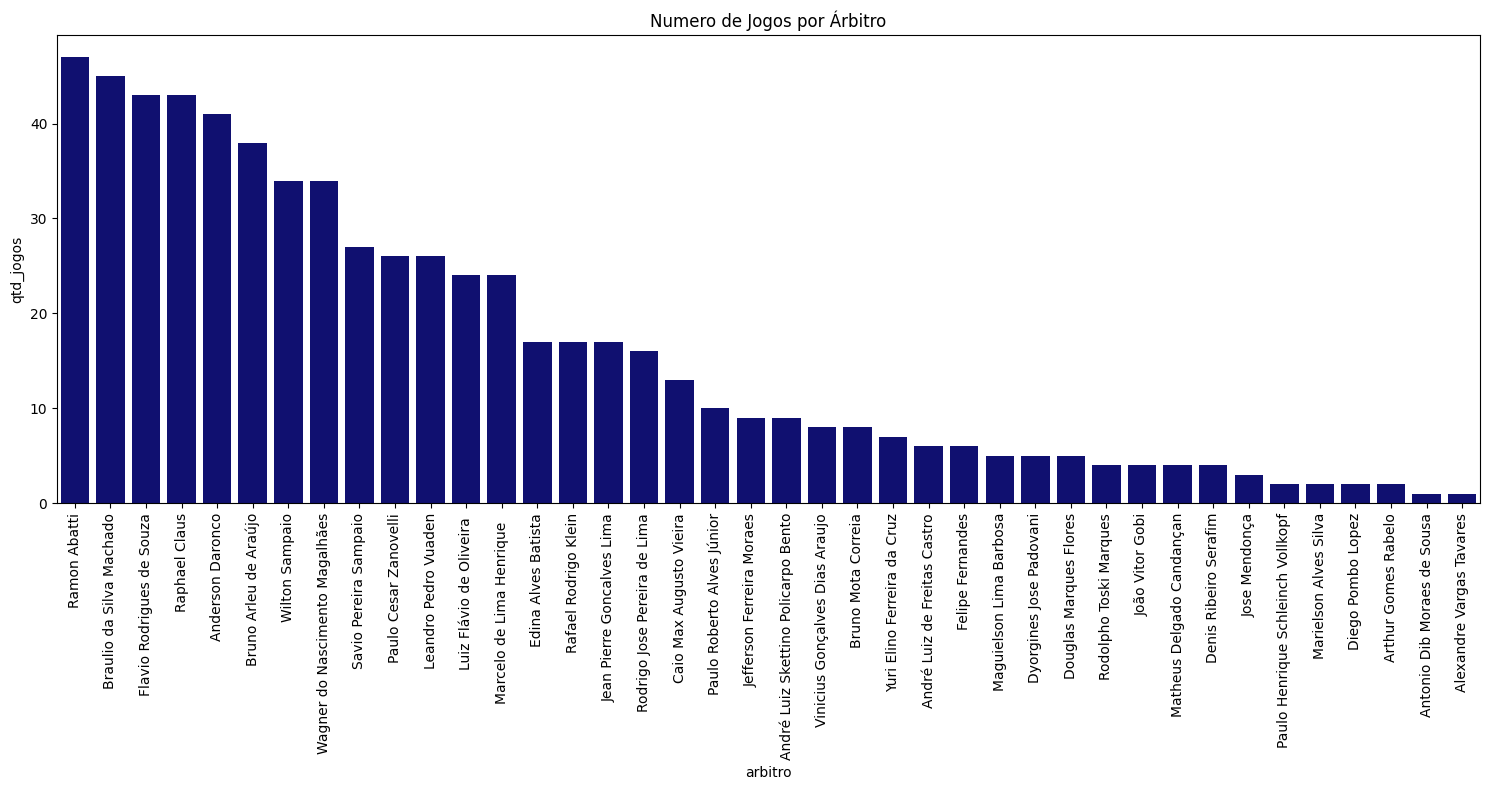

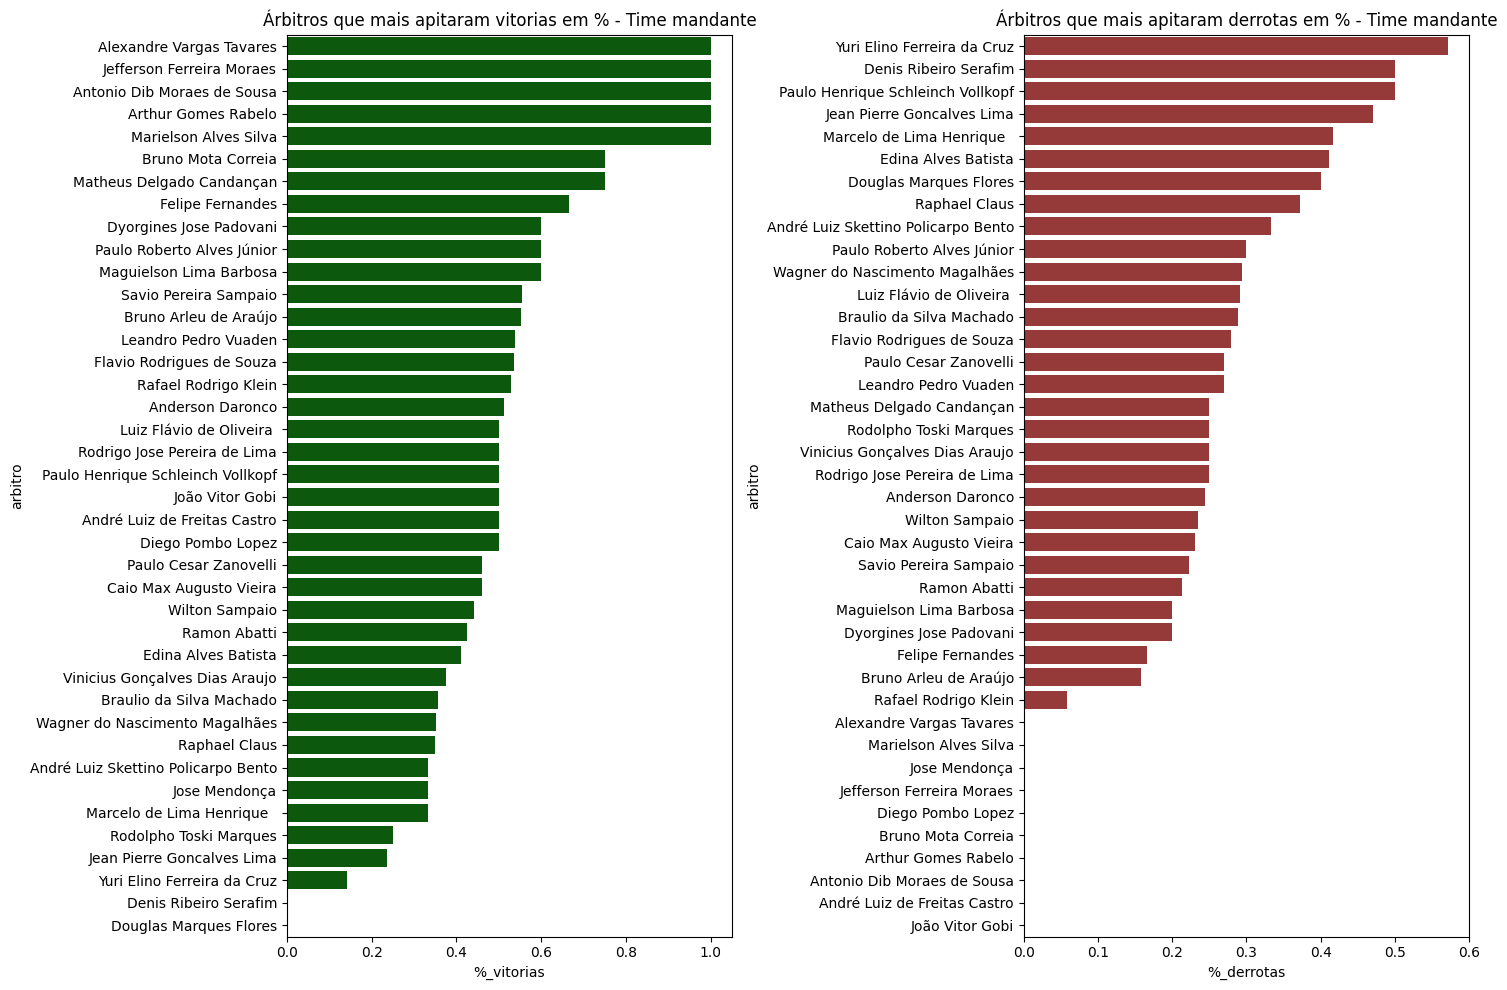

In [29]:
aux = df.groupby(['arbitro'], as_index=False).agg(qtd_jogos=('arbitro','count'),
                                                  qtd_vitoria_man=('vitoria_man',lambda x: (x==1).sum()),
                                                  qtd_empate=('vitoria_man',lambda x: (x==0).sum()),
                                                  qtd_derrota_man=('vitoria_man',lambda x: (x==-1).sum())
                                                  )

aux['%_vitorias'] = aux['qtd_vitoria_man']/aux['qtd_jogos']
aux['%_derrotas'] = aux['qtd_derrota_man']/aux['qtd_jogos']

plt.figure(figsize=(15,8))

sns.barplot(data=aux.sort_values(by='qtd_jogos',ascending=False), 
            x='arbitro', 
            y='qtd_jogos', 
            color='navy').set_title('Numero de Jogos por Árbitro')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2,figsize=(15,10))

sns.barplot(data=aux.sort_values(by='%_vitorias', ascending=False),
             x='%_vitorias', 
             y='arbitro',
             ax=axes[0],              
             color='darkgreen').set_title('Árbitros que mais apitaram vitorias em % - Time mandante')

sns.barplot(data=aux.sort_values(by='%_derrotas', ascending=False),
             x='%_derrotas', 
             y='arbitro',
             ax=axes[1],              
             color='brown').set_title('Árbitros que mais apitaram derrotas em % - Time mandante')

plt.tight_layout()
plt.show()



del aux

Bráulio da Silva Machado, Raphael Claus e Anderson Daronco são os árbitros que mais apitam jogos no Brasileirao.

Arthur Gomes Rabelo, Jefferson Ferreira Moraes, Thiago Scarascati e Matheus Cardançan, apesar das poucas quantidades de jogo apitados, são os árbitros que mais dão "sorte" ao time mandante.

Zandick Gondim e Thiago Peixoto lideram a arbitragem que traz "azar" ao time mandante.

- #### Qual torcida mais lota o estádio?

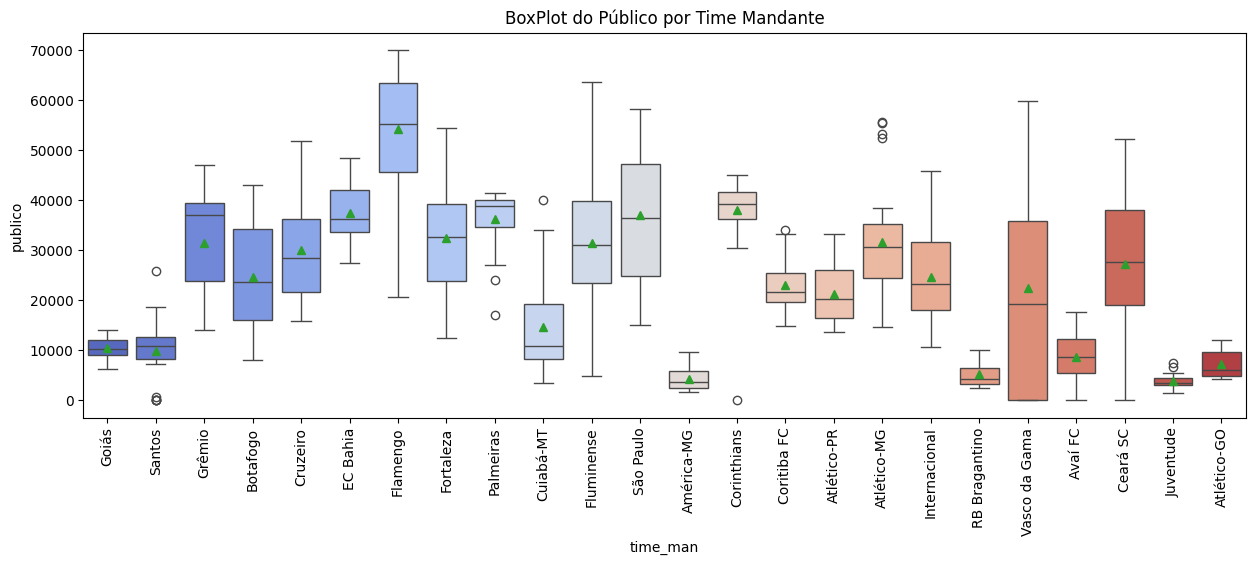

In [30]:
plt.figure(figsize=(15,5))

sns.boxplot(data=df, x='time_man',y='publico', showmeans=True, palette='coolwarm').set_title('BoxPlot do Público por Time Mandante')
plt.xticks(rotation=90)

plt.show()

Em méda, Cruzeiro é o time que mais lota o estádio do time mandante, seguido por Flamengo, Corinthians, Atlético-MG, São Paulo, Palmeiras e Fortaleza.

- #### Qual a equipe mais cara?

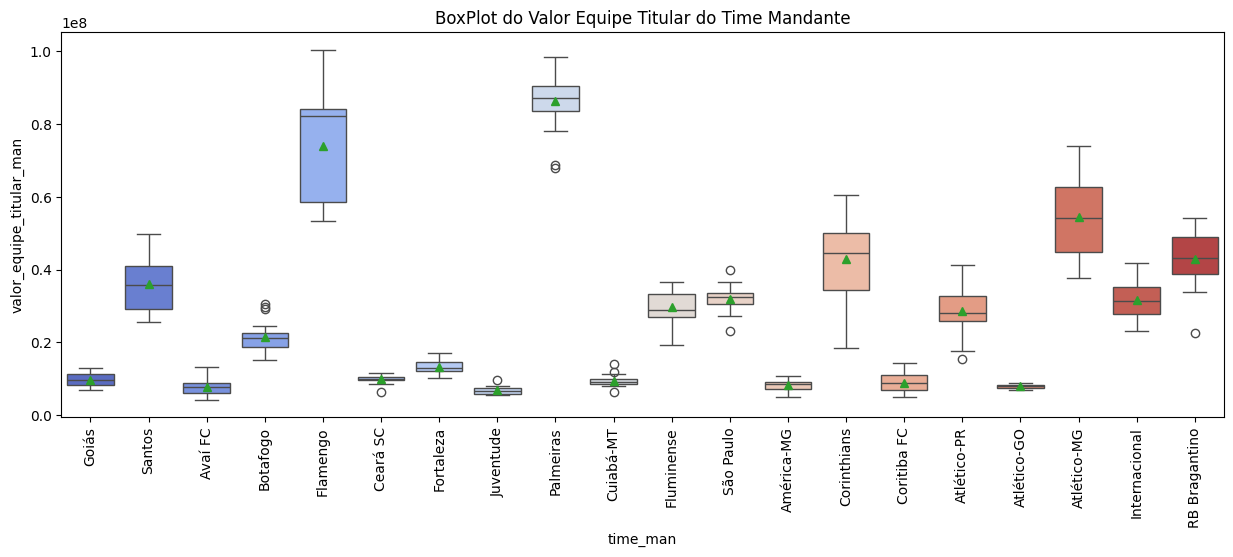

In [32]:
plt.figure(figsize=(15,5))

# Como os dados de 2023 estão zerados, vamos observar apenas até 2022 para essa variavel

sns.boxplot(data=df[df['ano_campeonato'].dt.year < 2023], x='time_man',y='valor_equipe_titular_man', 
            showmeans=True, palette='coolwarm').set_title('BoxPlot do Valor Equipe Titular do Time Mandante')
plt.xticks(rotation=90)

plt.show()

Em média, Flamengo, Palmeiras e Atlético-MG detém os elencos mais caros com valores de R$60 MM, R$48.3 MM e R$35 MM respectivamente.

- #### Qual a equipe mais jovem?

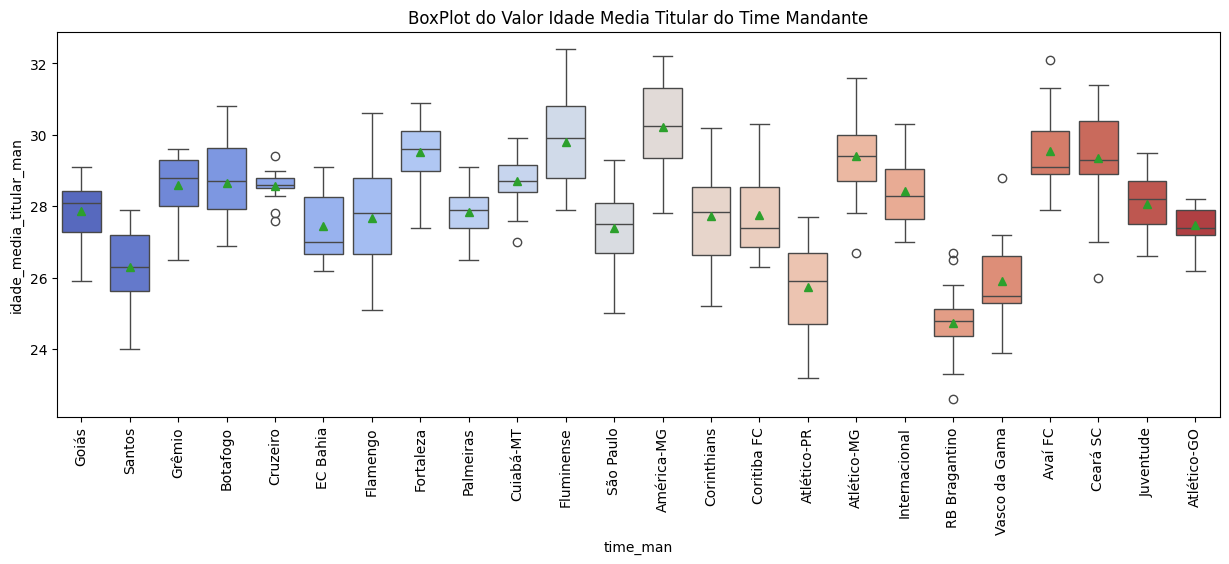

In [33]:
plt.figure(figsize=(15,5))

sns.boxplot(data=df, x='time_man',
            y='idade_media_titular_man', showmeans=True, palette='coolwarm').set_title('BoxPlot do Valor Idade Media Titular do Time Mandante')
plt.xticks(rotation=90)

plt.show()

RB Bragantino, Atlético-PR e Santos são as 3 equipes mais jovens

## Análise de Desempenho (Gols, Tecnicos, Valor e Idade do time titular)

- #### Quais times marcaram mais gols? Quais sofreram mais gols?

In [34]:
def analise_sumarizada(coluna):
    '''
    Funcao que sumariza algumas estatisticas, em todas as partidas, agrupado por uma coluna.
    Para a utilização, é necessario que a coluna tenha o sufixo _man ou _vis
    '''
    df_man = df.groupby(f'{coluna}_man',as_index=False).agg(gols_marcados_man=('gols_man','sum'),                                        
                                          gols_sofridos_man=('gols_vis','sum'),
                                          vitorias_man=('vitoria_man', lambda x: (x==1).sum()),
                                          derrotas_man=('vitoria_man', lambda x: (x==-1).sum()),
                                          empates_man=('vitoria_man', lambda x: (x==0).sum()),
                                          escanteios_man=('escanteios_man','sum'),
                                          faltas_man=('faltas_man','sum'), 
                                          faltas_sofridas_man=('faltas_vis','sum'),                                         
                                          chutes_bola_parada_man=('chutes_bola_parada_man','sum'),
                                          defesas_man=('defesas_man','sum'),
                                          impedimentos_man=('impedimentos_man','sum'),
                                          chutes_man=('chutes_man','sum'),
                                          chutes_fora_man=('chutes_fora_man','sum'),
                                          qtd_jogos_man=('time_man','count')                                          
                                          )
    df_man.rename({f'{coluna}_man': f'{coluna}'},axis=1, inplace=True)

    df_vis = df.groupby(f'{coluna}_vis',as_index=False).agg(gols_marcados_vis=('gols_vis','sum'),
                                          gols_sofridos_vis=('gols_man','sum'),
                                          vitorias_vis=('vitoria_man', lambda x: (x==-1).sum()),
                                          derrotas_vis=('vitoria_man', lambda x: (x==1).sum()),
                                          empates_vis=('vitoria_man', lambda x: (x==0).sum()),         
                                          escanteios_vis=('escanteios_vis','sum'),
                                          faltas_vis=('faltas_vis','sum'), 
                                          faltas_sofridas_vis=('faltas_man','sum'),
                                          chutes_bola_parada_vis=('chutes_bola_parada_vis','sum'),
                                          defesas_vis=('defesas_vis','sum'),
                                          impedimentos_vis=('impedimentos_vis','sum'),
                                          chutes_vis=('chutes_vis','sum'),
                                          chutes_fora_vis=('chutes_fora_vis','sum'),
                                          qtd_jogos_vis=('time_vis','count')
                                          )
    
    df_vis.rename({f'{coluna}_vis': f'{coluna}'},axis=1, inplace=True)

    aux = pd.merge(df_man, df_vis, how='outer', on=[f'{coluna}'])

    for c in ['gols_marcados', 'gols_sofridos', 'vitorias', 'derrotas', 'empates','escanteios','faltas', 'faltas_sofridas',
           'chutes_bola_parada', 'defesas', 'impedimentos', 'chutes', 'chutes_fora', 'qtd_jogos']:
        aux[c] = aux[f'{c}_man'] + aux[f'{c}_vis']
        aux.drop(columns=[f'{c}_man', f'{c}_vis'], inplace=True)

    aux['gols_por_jogo'] = aux['gols_marcados']/aux['qtd_jogos']
    aux['gols_sofridos_por_jogo'] = aux['gols_sofridos']/aux['qtd_jogos']
    aux['neg_gols_sofridos_por_jogo'] = -aux['gols_sofridos_por_jogo'] 
    aux['dif_golm_gols'] = aux['gols_por_jogo'] - aux['gols_sofridos_por_jogo']

    return aux

In [35]:
aux = analise_sumarizada('time')

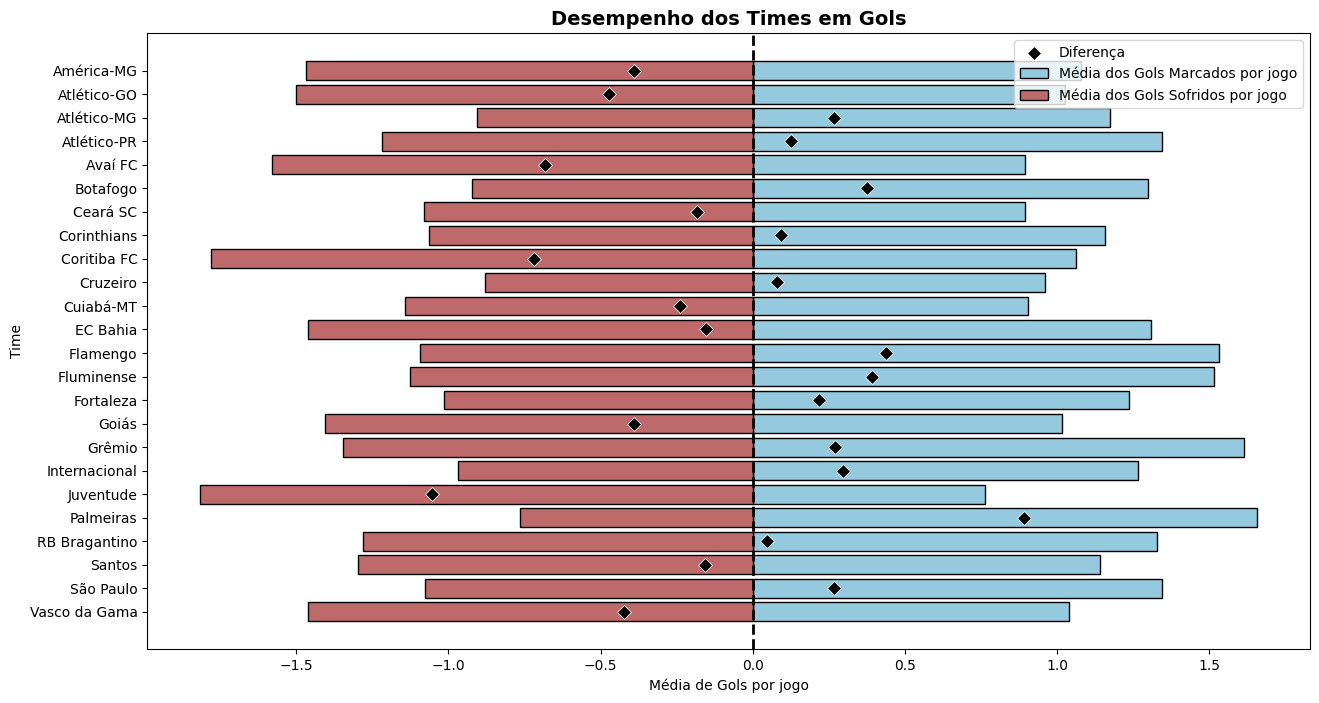

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(data=aux, y='time', x='gols_por_jogo', color='skyblue', edgecolor='black', label='Média dos Gols Marcados por jogo')
sns.barplot(data=aux, y='time', x='neg_gols_sofridos_por_jogo', color='indianred', edgecolor='black', label='Média dos Gols Sofridos por jogo')
sns.scatterplot(data=aux, y='time', x='dif_golm_gols', s=50, color='black', marker='D', label='Diferença')

plt.axvline(x=0, color='black', linestyle='--', linewidth=2, )

plt.xlabel('Média de Gols por jogo')
plt.ylabel('Time')
plt.title('Desempenho dos Times em Gols', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

Os times que lideram na marcação de gols são o Flamengo, Palmeiras e Atlético-MG

Os time que mais sofreram gols são o Chapecoense, Avaí, Coritiba, Goiás e Juventude, mostrando desempenho negativos.

- #### Quais tecnicos tem os melhores e piores desempenhos?

In [37]:
aux = analise_sumarizada('tecnico').dropna()

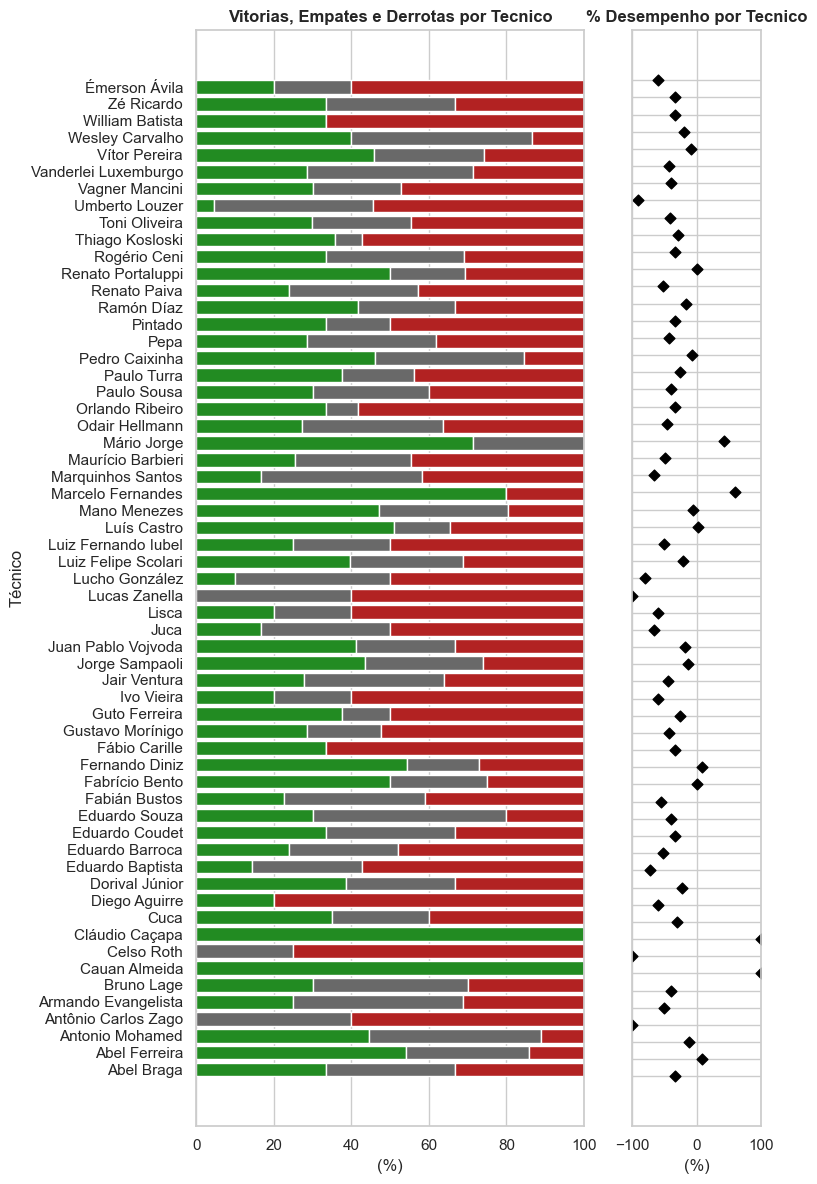

In [38]:
aux['%_vitorias'] = (aux['vitorias'] / aux['qtd_jogos']) * 100
aux['%_empates'] = (aux['empates'] / aux['qtd_jogos']) * 100
aux['%_derrotas'] = (aux['derrotas'] / aux['qtd_jogos']) * 100
aux['%_desempenho'] = ((aux['vitorias']-aux['empates']-aux['derrotas'])/aux['qtd_jogos'])*100

sns.set(style='whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(8, 12), gridspec_kw={'width_ratios': [3, 1]})

axs[0].barh(aux['tecnico'], aux['%_vitorias'], label='Vitórias', color='forestgreen')
axs[0].barh(aux['tecnico'], aux['%_empates'], left=aux['%_vitorias'], label='Empates', color='dimgray')
axs[0].barh(aux['tecnico'], aux['%_derrotas'], left=aux['%_vitorias'] + aux['%_empates'], label='Derrotas', color='firebrick')
axs[1].scatter(aux['%_desempenho'], aux['tecnico'], color='black', s=30, marker='D')

axs[0].set_title('Vitorias, Empates e Derrotas por Tecnico', fontweight='bold')
axs[0].set_ylabel('Técnico')
axs[0].set_xlabel('(%)')

axs[1].set_title('% Desempenho por Tecnico', fontweight='bold')
axs[1].set_xlabel('(%)')
axs[1].tick_params(axis='y', labelleft=False)
axs[1].set_xlim([-100,100])

plt.tight_layout()
plt.show()

Os técnicos que se destacam em desempenho positivo são: Cláudio Caçapa, Mário Jorge, Andrey Lopes, Marcelo Fernandes e Renato Portaluppi.

Os técnicos com piores desempenhos são: Felipe Endres, Emiliano Diaz, Felipe Lucena, Flavio Tenius, Alexandre Grasseli, Rodrigo Santana, entre outros...

- #### Existe alguma relação entre o valor da equipe titular e o desempenho do time?
- #### Existe alguma relação entre a idade da equipe titular e o desempenho do time?

In [41]:
# Como os dados de valor equipe para 2023 estao impactados, vamos tirá-lo desta analise

aux_man = df[df['ano_campeonato'].dt.year < 2023][['valor_equipe_titular_man','idade_media_titular_man', 'colocacao_man', 'vitoria_man']]
aux_man.rename(columns={'valor_equipe_titular_man': 'valor_equipe_titular',
                        'idade_media_titular_man': 'idade_media_titular',
                        'colocacao_man':'colocacao',
                        'vitoria_man': 'vitoria'}, inplace=True)

aux_vis = df[df['ano_campeonato'].dt.year < 2023][['valor_equipe_titular_vis','idade_media_titular_vis', 'colocacao_vis', 'vitoria_man']]
aux_vis['vitoria_vis'] = -1*aux_vis['vitoria_man']
aux_vis.drop('vitoria_man', axis=1, inplace=True)
aux_vis.rename(columns={'valor_equipe_titular_vis': 'valor_equipe_titular',
                        'idade_media_titular_vis': 'idade_media_titular',
                        'colocacao_vis':'colocacao',
                        'vitoria_vis': 'vitoria'}, inplace=True)

aux = pd.concat([aux_man, aux_vis]).reset_index()
aux['vitoria'] = aux['vitoria'].astype(int)

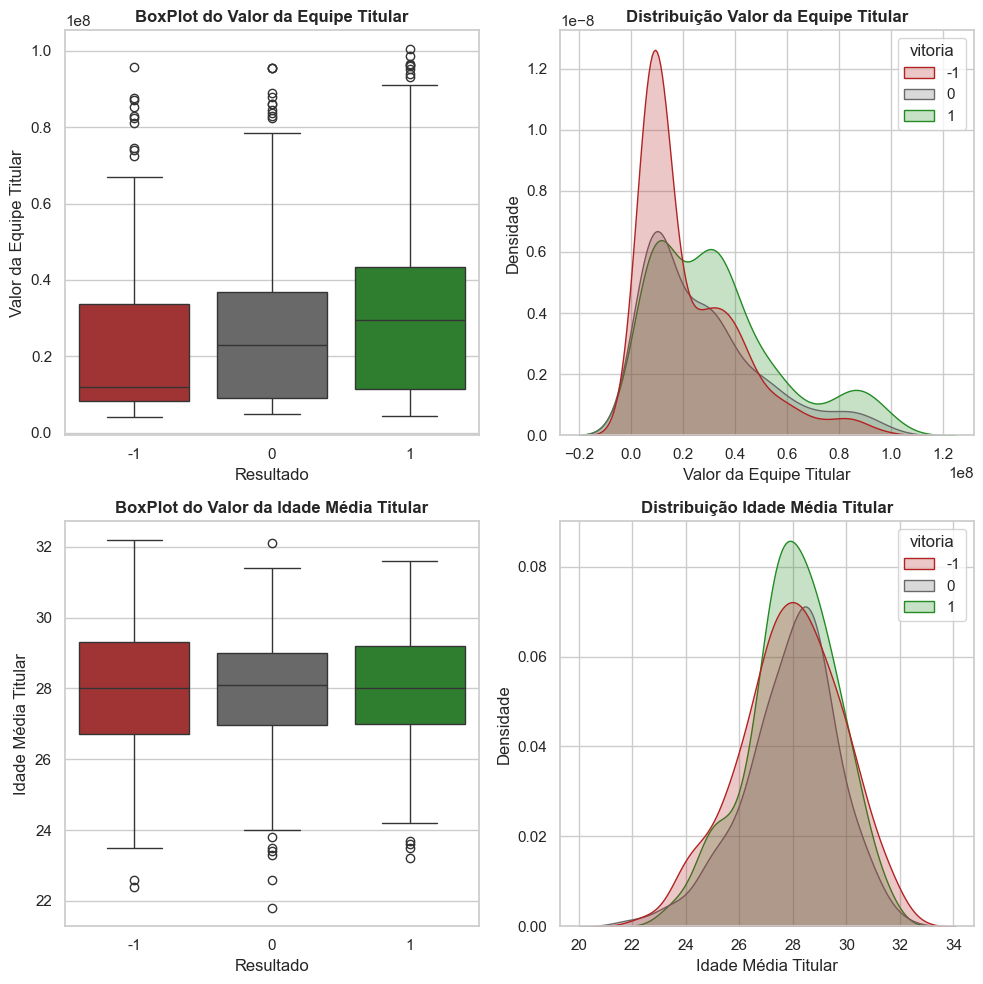

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=aux, x='vitoria', y='valor_equipe_titular', ax=axs[0, 0], palette=['firebrick', 'dimgray', 'forestgreen'])
axs[0, 0].set_xlabel('Resultado', fontsize=12)
axs[0, 0].set_ylabel('Valor da Equipe Titular', fontsize=12)
axs[0, 0].set_title('BoxPlot do Valor da Equipe Titular', fontweight='bold')

# KDE - Valor da equipe titular por resultado
sns.kdeplot(data=aux, x='valor_equipe_titular', hue='vitoria', fill=True, ax=axs[0, 1], palette=['firebrick', 'dimgray', 'forestgreen'])
axs[0, 1].set_xlabel('Valor da Equipe Titular', fontsize=12)
axs[0, 1].set_ylabel('Densidade', fontsize=12)
axs[0, 1].set_title('Distribuição Valor da Equipe Titular', fontweight='bold')

# Boxplot - Idade média titular por resultado
sns.boxplot(data=aux, x='vitoria', y='idade_media_titular', ax=axs[1, 0], palette=['firebrick', 'dimgray', 'forestgreen'])
axs[1, 0].set_xlabel('Resultado', fontsize=12)
axs[1, 0].set_ylabel('Idade Média Titular', fontsize=12)
axs[1, 0].set_title('BoxPlot do Valor da Idade Média Titular', fontweight='bold')

# KDE - Idade média titular por resultado
sns.kdeplot(data=aux, x='idade_media_titular', hue='vitoria', fill=True, ax=axs[1, 1], palette=['firebrick', 'dimgray', 'forestgreen'])
axs[1, 1].set_xlabel('Idade Média Titular', fontsize=12)
axs[1, 1].set_ylabel('Densidade', fontsize=12)
axs[1, 1].set_title('Distribuição Idade Média Titular', fontweight='bold')

plt.tight_layout()
plt.show()

Equipes mais caras tendem a trazer mais vitoria para o time, isto pois jogadores mais caros são mais habilidosos e agregam mais para o time. No entanto, a média da Idade do time titular nao diferencia no desempenho da equipe.

## Análise de Correlação para variáveis numéricas

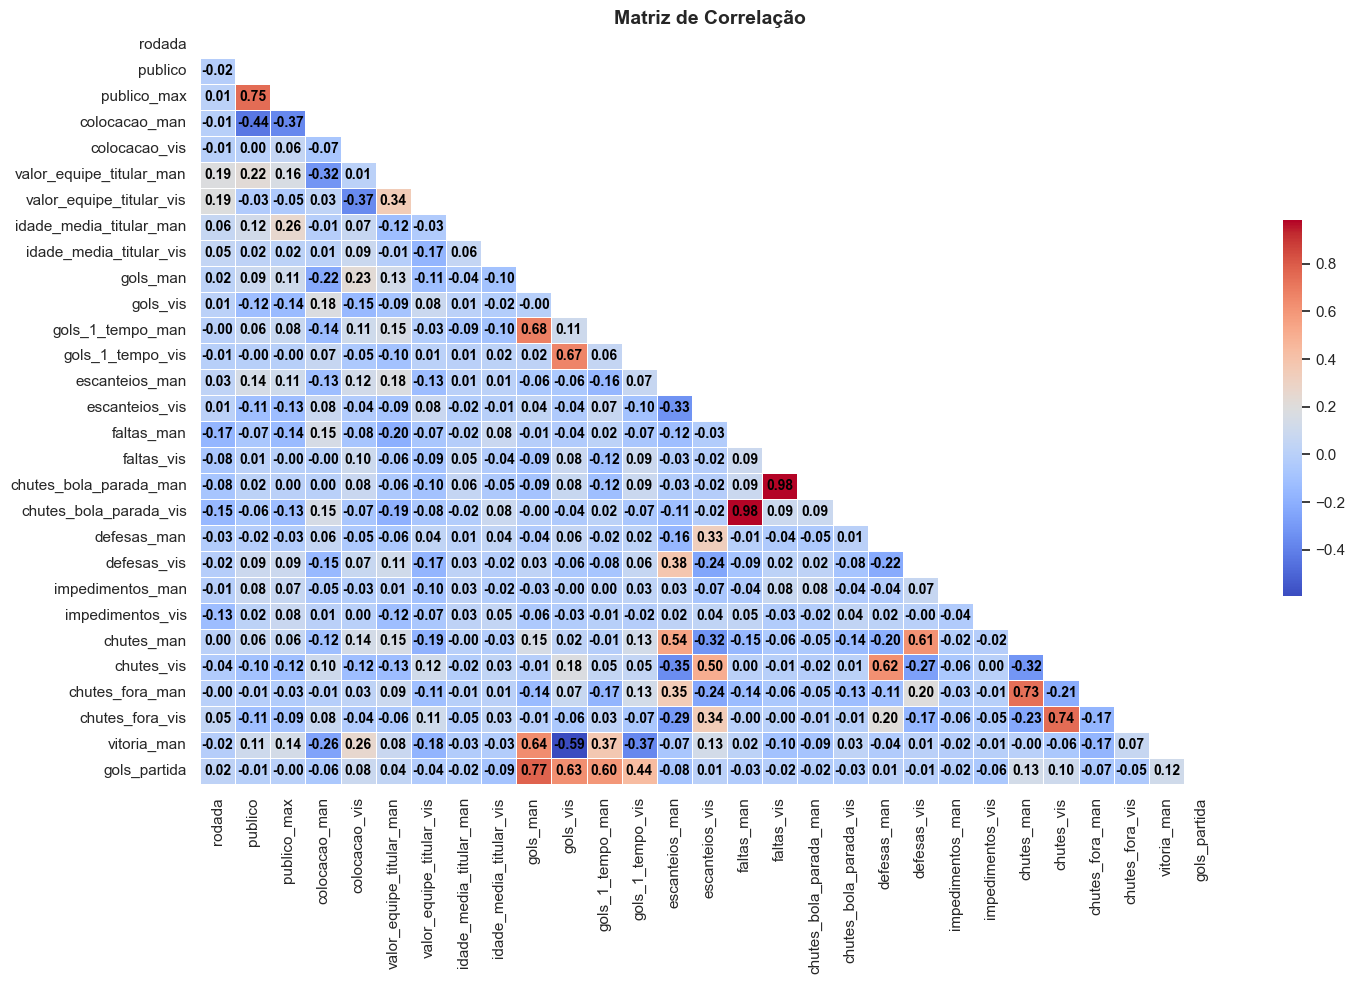

In [44]:
aux = df.select_dtypes(include=['float64', 'int64']).dropna()
matriz_correlacao = aux.corr()

mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))
sns.set(style="white")
plt.figure(figsize=(15, 10))

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'}, linewidths=.5, mask=mask, cbar_kws={'shrink': 0.5})

plt.title('Matriz de Correlação', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Correlações positivas:
- gols primeiro tempo mandante x quantidade de gols mandante: correlação obvia pois os gols totais de mandantes da partida dependem dos gols do primeiro tempo do mandante.
- gols primeiro tempo visitante x quantidade de gols visitante: mesma justificativa acima.
- vitoria mandante x gols mandante: a vitoria depende dos gols, o mesmo vale para visitantes
- gols partida x gols mandante: o mesmo vale para visitante

Correlações negativas:
- valor da equipe em relacao à colocação: equipes menos habilidosas (valor médio do time baixo) tendem a sofrer mais derrotas e por consequencia ficar nas piores colocações (maior numero na tabela)
- vitoria mandante x gols visitantes: Se um perde está relacionado com gols do adversário.

# Engenharia de Features
O objetivo é criar novas features com relação aos dados disponíveis. A visão a ser construida será por partida e time, ou seja, por rodada do campeonato.
- features pontuais da partida: visoes em percentual, quantidade, flag indicacao de jogo dentro ou fora (parte delas serão variáveis auxiliares para as janeladas)
- features no tempo: observações de tendências

Ao final, a ideia é adicionar essas novas features ao dataframe ao qual vamos modelos (a partir de 2018), tanto para time mandante quanto visitante

In [45]:
def features_pontuais(df):
    df_man = df.copy()
    df_vis = df.copy()

    totais = ['escanteios','faltas','impedimentos','chutes','chutes_bola_parada','chutes_fora','defesas','gols']
    renom = ['colocacao','time','tecnico','valor_equipe_titular','idade_media_titular']
    dfs = [df_man, df_vis]

    for i in range(len(dfs)):
        df = dfs[i]    
        df['vitoria_man'] = df['vitoria_man'].astype(int)  
        if i == 0:
            df['flag_jogo_casa'] = 1
            df['diff_idade_media_adv'] = df['idade_media_titular_man'] - df['idade_media_titular_vis']
            df['diff_valor_equipe_adv'] = df['valor_equipe_titular_man'] - df['valor_equipe_titular_vis']
            df['diff_colocacao_adv'] = df['colocacao_man'] - df['colocacao_vis']
            # Auxiliares
            for c in totais:
                df[f'{c}_totais'] = df[f'{c}_man'] + df[f'{c}_vis']
                df[f'perc_{c}_com'] = df[f'{c}_man'] / df[f'{c}_totais']
                df[f'perc_{c}_sof'] = df[f'{c}_vis'] / df[f'{c}_totais']    
                df.rename(columns={f'{c}_man' : f'{c}_com'}, inplace=True)     
                df.rename(columns={f'{c}_vis' : f'{c}_sof'}, inplace=True)
            for r in renom:
                df.rename(columns={f'{r}_man' : f'{r}'}, inplace=True)
            # df.rename(columns={f'gols_man' : f'gols_com'}, inplace=True)
            # df.rename(columns={f'gols_vis' : f'gols_sof'}, inplace=True)
            df.rename(columns={f'vitoria_man' : f'vitoria'}, inplace=True)
            df['time_adversario'] = df['time_vis']         

        elif i == 1:
            df['flag_jogo_casa'] = 0
            df['diff_idade_media_adv'] = df['idade_media_titular_vis'] - df['idade_media_titular_man']
            df['diff_valor_equipe_adv'] = df['valor_equipe_titular_vis'] - df['valor_equipe_titular_man']
            df['diff_colocacao_adv'] = df['colocacao_vis'] - df['colocacao_man']
            # Auxiliares
            for c in totais:
                df[f'{c}_totais'] = df[f'{c}_man'] + df[f'{c}_vis']
                df[f'perc_{c}_com'] = df[f'{c}_vis'] / df[f'{c}_totais']
                df[f'perc_{c}_sof'] = df[f'{c}_man'] / df[f'{c}_totais']     
                df.rename(columns={f'{c}_man' : f'{c}_sof'}, inplace=True)     
                df.rename(columns={f'{c}_vis' : f'{c}_com'}, inplace=True)    
            for r in renom:
                df.rename(columns={f'{r}_vis' : f'{r}'}, inplace=True)
            # df.rename(columns={f'gols_vis' : f'gols_com'}, inplace=True)
            # df.rename(columns={f'gols_man' : f'gols_sof'}, inplace=True)
            df.rename(columns={f'vitoria_man' : f'vitoria'}, inplace=True)
            df['vitoria'] = -df['vitoria']
            df['time_adversario'] = df['time_man']
        
        dropar = [k for k in df.columns if any(substring in k for substring in ['totais', 'man', 'vis'])]
        df.drop(columns=dropar, inplace=True)
        
    return pd.concat([df_man,df_vis]).reset_index()

In [46]:
del df # Deleta o dataframe de EDA

data.sort_values(by=['data'],ascending=True, inplace=True) 

df = data.copy() # Dataframe para Feature Engineering

In [47]:
df_ = features_pontuais(df)

In [48]:
df.shape, df_.shape

((2159, 37), (4318, 52))

Podemos ver que a quantidade de registros foi duplicada. Isso pois no dataframe original, a visão era time mandante x time visitante. Com o dataframe para engenharia de features, a ideia e analisar cada time isoladamente de acordo com suas variaveis.

In [49]:
def features_num_janelas(df, variavel, janelas):
    for j in janelas:
        
        df[f'med_{variavel}_{j}'] = (
            df.groupby('time')[variavel]
            .rolling(window=j, min_periods=1, closed='left')
            .mean()
            .reset_index(level=0, drop=True)
        )        
        
    return df

def tecnicos_janelas(df, janela):
    for j in janela:
        df[f'qtd_tecnicos_distintos_{j}'] = (
             df.groupby('time')['tecnico']
            .apply(lambda x: x.rolling(window=j, min_periods=1, closed='left').apply(lambda y: y.nunique()))
            .reset_index(level=0, drop=True)
        )
    return df

def diff_colocacao(df, janela):
    for j in janela:
        df[f'diff_colocacao_{j}'] = df.groupby('time')['colocacao'].diff(j)
    return df

def resultado_dentro_fora(df,janela):
    for j in janela:
        df['vitoria_casa'] = (df['vitoria'] == 1) & (df['flag_jogo_casa'] == 1)
        df['derrota_casa'] = (df['vitoria'] == -1) & (df['flag_jogo_casa'] == 1)
        df['empate_casa'] = (df['vitoria'] == 0) & (df['flag_jogo_casa'] == 1)

        df['vitoria_fora'] = (df['vitoria'] == 1) & (df['flag_jogo_casa'] == 0)
        df['derrota_fora'] = (df['vitoria'] == -1) & (df['flag_jogo_casa'] == 0)
        df['empate_fora'] = (df['vitoria'] == 0) & (df['flag_jogo_casa'] == 0)

        for i in ['vitoria','empate','derrota']:
            for p in ['casa','fora']:
                pfx = f'{i}_{p}'
                df[f'{pfx}_{j}'] = (
                    df.groupby('time')[pfx]
                    .rolling(window=j, min_periods=1, closed='left')  
                    .sum()  
                    .reset_index(level=0, drop=True) 
                ) 
                df.drop(pfx,axis=1,inplace=True)

    return df

def rodadas_sem_sofrer_gols(df):
    '''
        Função para calcular rodadas consecutivas sem sofrer gols.
        Thanks to: https://predictivehacks.com/count-the-consecutive-events-in-python/
    '''
    df_aux = df.sort_values(by='data').copy()
    for time in np.unique(df_aux['time']):
        for ano in np.unique(df_aux['ano_campeonato'].dt.year):
            mask = (df_aux['time'] == time) & (df_aux['ano_campeonato'].dt.year == ano)
            df_time_temp = df_aux.loc[mask].sort_values(by='rodada').copy()
            df_time_temp = df_aux[(df_aux['time'] == time) & (df_aux['ano_campeonato'].dt.year == ano)] # Filtra time e temporada
            df_time_temp['golsof_jogo_ant'] = (df_time_temp['gols_sof'].shift(1) > 0).astype(int) # Flag se sofreu gol no jogo anterior
            df_time_temp['streak_sem_sofrer_gols'] = df_time_temp['golsof_jogo_ant'].\
                groupby((df_time_temp['golsof_jogo_ant'] != df_time_temp['golsof_jogo_ant'].shift()).cumsum()).cumcount() + 1 # Conta sequencia de rodada sem sofrer gol
            df_time_temp.loc[df_time_temp['golsof_jogo_ant']==1, 'streak_sem_sofrer_gols'] = 0 # Caso tenha sofrido gols, zerar o contador
            df_time_temp.drop(columns='golsof_jogo_ant',inplace=True)

            df_aux.loc[mask,'streak_sem_sofrer_gols'] = df_time_temp['streak_sem_sofrer_gols']

    return df_aux

def vitorias_consecutivas(df):
    '''
        Função para calcular rodadas consecutivas sem sofrer gols.
        Thanks to: https://predictivehacks.com/count-the-consecutive-events-in-python/
    '''
    df_aux = df.sort_values(by='data').copy()
    for time in np.unique(df_aux['time']):
        for ano in np.unique(df_aux['ano_campeonato'].dt.year):
            mask = (df_aux['time'] == time) & (df_aux['ano_campeonato'].dt.year == ano)
            df_time_temp = df_aux.loc[mask].sort_values(by='rodada').copy()
            df_time_temp = df_aux[(df_aux['time'] == time) & (df_aux['ano_campeonato'].dt.year == ano)] # Filtra time e temporada
            df_time_temp['vitoria_jogo_ant'] = (df_time_temp['vitoria'].shift(1) == 1).astype(int) # Flag se sofreu gol no jogo anterior
            df_time_temp['streak_vitorias'] = df_time_temp['vitoria_jogo_ant'].\
                groupby((df_time_temp['vitoria_jogo_ant'] != df_time_temp['vitoria_jogo_ant'].shift()).cumsum()).cumcount() + 1 # Conta sequencia de rodada sem sofrer gol
            df_time_temp.loc[df_time_temp['vitoria_jogo_ant']==0, 'streak_vitorias'] = 0 # Caso tenha sofrido gols, zerar o contador
            df_time_temp.drop(columns='vitoria_jogo_ant',inplace=True)

            df_aux.loc[mask, 'streak_vitorias'] = df_time_temp['streak_vitorias']
    
    return df_aux

In [50]:
variaveis = ['gols', 'faltas','chutes','chutes_bola_parada','defesas','impedimentos','chutes']
visao = ['com','sof'] #cometidos, sofridos

janelas = [3, 6]

df_ = features_num_janelas(df_, 'publico', janelas)

for variavel in variaveis:
    for vis in visao:
        v1 = f'{variavel}_{vis}'
        v2 = f'perc_{variavel}_{vis}'
        df_ = features_num_janelas(df_, v1, janelas)
        df_ = features_num_janelas(df_, v2, janelas)

# df_ = tecnicos_janelas(df_,[6,12])
df_ = diff_colocacao(df_,[3,6])
df_ = resultado_dentro_fora(df_,[3,6])
df_ = rodadas_sem_sofrer_gols(df_)
df_ = vitorias_consecutivas(df_)

Como o nosso objetivo é prever se um time vai ganhar ou perder na próxima partida, algumas variáveis pontuais da estatística do jogo não são necessárias. Ainda assim, utilizá-las no modelo causaria em vazamento de dados e utilização de dados futuros.

In [51]:
df_.drop(columns=[
    'gols_com',
    'gols_sof',
    'escanteios_com',
    'escanteios_sof',
    'faltas_com',
    'faltas_sof',
    'chutes_bola_parada_com',
    'chutes_bola_parada_sof',
    'defesas_com',
    'defesas_sof',
    'impedimentos_com',
    'impedimentos_sof',
    'chutes_com',
    'chutes_sof',
    'chutes_fora_com',
    'chutes_fora_sof',
    'gols_partida',
    'perc_escanteios_com',
    'perc_escanteios_sof',
    'perc_faltas_com',
    'perc_faltas_sof',
    'perc_impedimentos_com',
    'perc_impedimentos_sof',
    'perc_chutes_com',
    'perc_chutes_sof',
    'perc_chutes_bola_parada_com',
    'perc_chutes_bola_parada_sof',
    'perc_chutes_fora_com',
    'perc_chutes_fora_sof',
    'perc_defesas_com',
    'perc_defesas_sof',
    'perc_gols_com',
    'perc_gols_sof'
], inplace=True)

#### - Analise de Missings

index: 0 (0.00%)
ano_campeonato: 0 (0.00%)
data: 0 (0.00%)
rodada: 0 (0.00%)
estadio: 0 (0.00%)
arbitro: 0 (0.00%)
publico: 0 (0.00%)
publico_max: 28 (0.65%)
time: 0 (0.00%)
tecnico: 156 (3.61%)
colocacao: 0 (0.00%)
valor_equipe_titular: 46 (1.07%)
idade_media_titular: 46 (1.07%)
vitoria: 0 (0.00%)
flag_jogo_casa: 0 (0.00%)
diff_idade_media_adv: 46 (1.07%)
diff_valor_equipe_adv: 46 (1.07%)
diff_colocacao_adv: 0 (0.00%)
time_adversario: 0 (0.00%)
med_publico_3: 29 (0.67%)
med_publico_6: 29 (0.67%)
med_gols_com_3: 29 (0.67%)
med_gols_com_6: 29 (0.67%)
med_perc_gols_com_3: 31 (0.72%)
med_perc_gols_com_6: 31 (0.72%)
med_gols_sof_3: 29 (0.67%)
med_gols_sof_6: 29 (0.67%)
med_perc_gols_sof_3: 31 (0.72%)
med_perc_gols_sof_6: 31 (0.72%)
med_faltas_com_3: 543 (12.58%)
med_faltas_com_6: 324 (7.50%)
med_perc_faltas_com_3: 556 (12.88%)
med_perc_faltas_com_6: 332 (7.69%)
med_faltas_sof_3: 543 (12.58%)
med_faltas_sof_6: 324 (7.50%)
med_perc_faltas_sof_3: 556 (12.88%)
med_perc_faltas_sof_6: 332 (7.69%

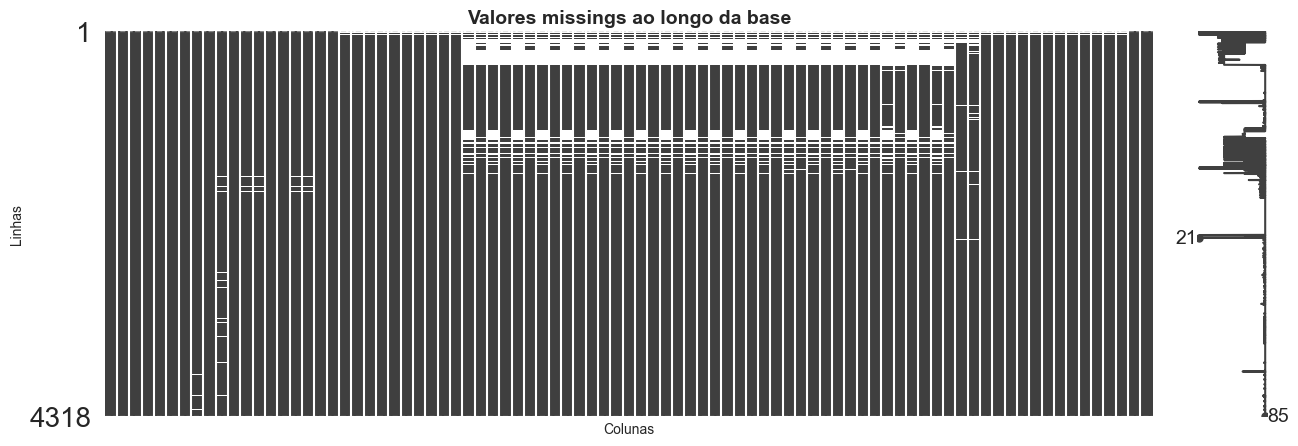

In [52]:
for c in df_.columns:
    print(f'{c}: {df_[c].isna().sum()} ({df_[c].isna().sum()/len(df_)*100:3.2f}%)')

msno.matrix(df_, figsize=(15, 5), sparkline=True)

plt.xlabel('Colunas', fontsize=10)
plt.ylabel('Linhas', fontsize=10)
plt.title('Valores missings ao longo da base', fontsize=14, fontweight='bold')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

Podemos observar que os valores missings não estao concentrados em apenas uma porção da base de dados, mas sim distribuidos. Como estamos trabalhando com dados temporais, uma boa abordagem para a tratativa dos valores missings seria a interpolação. Para uma imputação mais segura, vamos olhar time a time.

Para a coluna "tecnico" vamos atribuir os valores missings como o último valor válido, ou seja, com o último técnico conhecido.

In [53]:
df_.sort_values(by=['data'],ascending=True, inplace=True)

for time in np.unique(df_['time']):
    df_time = df_[df_['time']==time]

    # Tecnico
    df_time['tecnico'] = df_time['tecnico'].fillna(method='ffill')
    df_.loc[df_['time']==time, 'tecnico'] = df_time['tecnico']

    df_time.set_index('data', inplace=True)
    # Colunas numericas e que contém missings.
    num_cols = [col for col in df_time.select_dtypes(include=['float64','int64']).columns if df_time[col].isna().sum() > 0]
    
    for c in num_cols:
        df_time[c] = df_time[c].interpolate(method='linear')
        df_.loc[df_['time']==time, c] = df_time[c].values

Junção para a base original

In [54]:
cols_a = [
    'ano_campeonato', 'data', 'rodada','estadio', 'arbitro','publico','publico_max','time_man', 'time_vis', 'vitoria_man'
]

cols_b = [
    c for c in df_.columns if c not in ['index', 'ano_campeonato', 'data', 'rodada', 'estadio', 'arbitro', 'publico', 'publico_max', 'time', 'time_adversario', 'vitoria']
]

In [55]:
df_1 = pd.merge(data[cols_a],
                df_[['ano_campeonato','data', 'rodada','time'] + cols_b], # Adiciona as novas features time mandante
                how='left',
                left_on=['ano_campeonato','data', 'rodada', 'time_man'], # Time mandante
                right_on=['ano_campeonato','data', 'rodada','time']).drop(['time'], axis=1)

df_1.rename(columns={c: f'{c}_man' for c in cols_b}, inplace=True)

In [56]:
df_2 = pd.merge(df_1,
                df_[['ano_campeonato','data', 'rodada','time'] + cols_b], # Adiciona as novas features time visitante
                how='left',
                left_on=['ano_campeonato','data', 'rodada', 'time_vis'], # Time visitante
                right_on=['ano_campeonato','data', 'rodada','time']).drop(['time'], axis=1) 

df_2.rename(columns={c: f'{c}_vis' for c in cols_b}, inplace=True)

In [57]:
[c for c in df_2.columns if 'diff' in c]

['diff_idade_media_adv_man',
 'diff_valor_equipe_adv_man',
 'diff_colocacao_adv_man',
 'diff_colocacao_3_man',
 'diff_colocacao_6_man',
 'diff_idade_media_adv_vis',
 'diff_valor_equipe_adv_vis',
 'diff_colocacao_adv_vis',
 'diff_colocacao_3_vis',
 'diff_colocacao_6_vis']

In [58]:
# Dropando colunas reduntantes
df_final = df_2.drop(['diff_idade_media_adv_vis', 'diff_valor_equipe_adv_vis', 'diff_colocacao_adv_vis'], axis=1)

In [59]:
for c in df_final.columns:
    print(f'{c}: {df_final[c].isna().sum()} ({df_final[c].isna().sum()/len(df_final)*100:3.2f}%)')

ano_campeonato: 0 (0.00%)
data: 0 (0.00%)
rodada: 0 (0.00%)
estadio: 0 (0.00%)
arbitro: 0 (0.00%)
publico: 0 (0.00%)
publico_max: 14 (0.65%)
time_man: 0 (0.00%)
time_vis: 0 (0.00%)
vitoria_man: 0 (0.00%)
tecnico_man: 0 (0.00%)
colocacao_man: 0 (0.00%)
valor_equipe_titular_man: 0 (0.00%)
idade_media_titular_man: 0 (0.00%)
flag_jogo_casa_man: 0 (0.00%)
diff_idade_media_adv_man: 0 (0.00%)
diff_valor_equipe_adv_man: 0 (0.00%)
diff_colocacao_adv_man: 0 (0.00%)
med_publico_3_man: 13 (0.60%)
med_publico_6_man: 13 (0.60%)
med_gols_com_3_man: 13 (0.60%)
med_gols_com_6_man: 13 (0.60%)
med_perc_gols_com_3_man: 13 (0.60%)
med_perc_gols_com_6_man: 13 (0.60%)
med_gols_sof_3_man: 13 (0.60%)
med_gols_sof_6_man: 13 (0.60%)
med_perc_gols_sof_3_man: 13 (0.60%)
med_perc_gols_sof_6_man: 13 (0.60%)
med_faltas_com_3_man: 13 (0.60%)
med_faltas_com_6_man: 13 (0.60%)
med_perc_faltas_com_3_man: 13 (0.60%)
med_perc_faltas_com_6_man: 13 (0.60%)
med_faltas_sof_3_man: 13 (0.60%)
med_faltas_sof_6_man: 13 (0.60%)
med_

Embora tenhamos realizado o preenchimento de boa parte dos valores missings, observa-se que eles ainda são presentes na base de dados especialmente para variáveis janeladas.
Vamos analisar a quantidade de registros que eles compõem e em que rodada do campeonato aparecem.

In [60]:
rodadas, qtd_regmiss = np.unique(df_final[df_final.isna().any(axis=1)]['rodada'], return_counts=True)

print(f'Rodada com missings: {rodadas}')
print(f'Qtd. de registros/linhas por rodada que contem pelo menos um valor missing: {qtd_regmiss}')

print(f'Soma de registros totais: {np.sum(qtd_regmiss)}')

Rodada com missings: [ 1  2  3  6  8 15 16 18 19 21 23 35]
Qtd. de registros/linhas por rodada que contem pelo menos um valor missing: [13  2  2  1  1  2  1  1  1  2  1  1]
Soma de registros totais: 28


In [61]:
len(df_final)

2159

Os valores missings representam apenas 28 registros e isso corresponde a 0.01% da base final. Portanto, nao sofreríamos tanto impacto se dropassemos.

In [62]:
df_final = df_final.dropna()
df_final.shape

(2131, 155)

#### Encoding nas variáveis categóricas.

Como as variáveis categóricas (estadio, arbitro, time e tecnico) são variáveis nominais (não tem uma ordem definida), podemos adotar a estratégia de dummies ou de target encoding agrupando por faixas de taxa de vitória, o que tornaria uma variável ordinal.

Como essas variáveis possuem uma cardinalidade expressiva, isto é, com muitas categorias, a nossa estratégia será a de target encoding. No entanto, deve-se atentar a trabalhar com target encoding apenas no conjunto de treinamento de forma a evitar o que chamamos de data leakage.

Assim sendo, antes de realizar o encoding, devemos dividir nosso conjunto de treinamento em treino e teste.


OBS: Utilizar informação de arbitro e estadio pode trazer um certo viés ao modelo, uma vez que a vitoria depende muito mais do tecnico e do desempenho do time do que o árbitro/estádio

- Divisao em treino e teste

Analise da distribuição das classes e volumetria ao longo dos anos

In [63]:
df_final['ano_campeonato'] = df_final['ano_campeonato'].dt.year.astype('str')
# data_final = df_final.copy()

In [64]:
# Cria variavei de vitoria binaria para time mandante: 1- vitoria, 0 - derrota
# Para nao causar um viés na modelagem, vamos retirar os empates

df_mod = df_final[df_final['vitoria_man']!=0] 
df_mod['vitoria'] = (df_final['vitoria_man']==1).astype(int)

In [87]:
# df_tst = df_final[df_final['vitoria_man']!=0]
# df_tst['vitoria'] = (df_tst['vitoria_man']==1).astype(int)

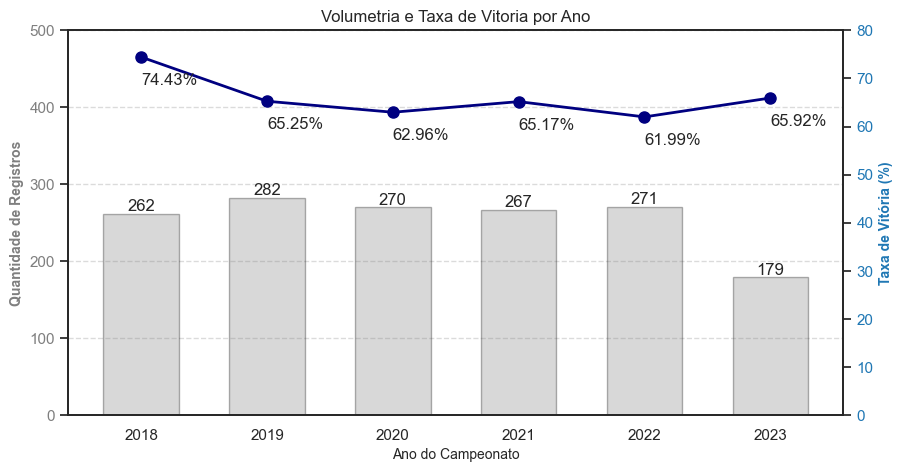

In [65]:
grouped_df = df_mod.groupby('ano_campeonato',as_index=False).agg(qtd=('vitoria','size'),
                                                              taxa_vitoria=('vitoria','mean')
                                                              )

fig, ax1 = plt.subplots(figsize=(10, 5))

# eixo y esquerdo
bars = ax1.bar(grouped_df['ano_campeonato'], grouped_df['qtd'], color='gray', edgecolor='black', alpha=0.3, width=0.6)

# labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

ax1.set_xlabel('Ano do Campeonato', fontsize=10)
ax1.set_ylabel('Quantidade de Registros', color='tab:gray', fontweight='bold', fontsize=10)
ax1.tick_params(axis='y', labelcolor='tab:gray')
# ax1.set_ylim(0,800)
ax1.set_ylim(0,500)

# eixo y direito
ax2 = ax1.twinx()
ax2.plot(grouped_df['ano_campeonato'], grouped_df['taxa_vitoria']*100, color='navy', marker='o', linestyle='-', linewidth=2, markersize=8)

# labels
for i, txt in enumerate(grouped_df['taxa_vitoria']):
    ax2.annotate(f'{round(txt*100, 2)}%', (grouped_df['ano_campeonato'].iloc[i], txt*100), textcoords="offset points", xytext=(0,-20))

ax2.set_ylabel('Taxa de Vitória (%)', color='tab:blue', fontweight='bold', fontsize=10)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0,80)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Volumetria e Taxa de Vitoria por Ano')
plt.show()

A taxa de vitoria se mostra relativamente estável ao longo do decorrer dos anos. Em termos de volumetria, nao temos todas as rodadas para o ano de 2023.

A nossa divisao dos conjuntos de treino e teste ser, a fim de respeitar o comportamento temporal, será:
-   Treino de 2018-2021
-   Teste 2022 e 2023

In [66]:
df_train = df_mod[df_mod['ano_campeonato'].astype(int) < 2022]
df_test = df_mod[df_mod['ano_campeonato'].astype(int) >= 2022]

In [67]:
df_train.shape, df_test.shape

((1081, 156), (450, 156))

In [68]:
# Verificação das taxas de vitoria
df_train['vitoria'].mean(), df_test['vitoria'].mean()

(0.6688251618871416, 0.6355555555555555)

- Encoding

Agora, podemos dar prosseguimento ao processo de target encoding.

Vamos realizar o encoding através das médias suavizadas (smoothing). O objetivo é evitar médias instáveis quando o numero de casos de uma das categorias for pequeno. A fórmula do Smoothed Mean é calculada como:

smooth = (counts * means + m * mean) / (counts + m)

Onde:
- counts é o número de valores em cada grupo,
- means é a média de cada grupo,
- m é o parâmetro de suavização,
- mean é a média global.

In [69]:
def calc_regra_smoothmean(data, by, on, m):

    df_man = data[[by, on]].copy()
    by_vis = by.replace('man','vis')
    df_vis = data[[by_vis, on]].copy()
    df_vis[on] = -df_vis[on] # Se for visitante, a vitoria é o valor -1

    df_man.rename(columns={by:f'''{by.split('_')[0]}'''}, inplace=True)
    df_vis.rename(columns={by:f'''{by.split('_')[0]}'''}, inplace=True)

    by_ = by.split('_')[0]
                  
    df = pd.concat([df_man, df_vis], ignore_index=True)
    # taxa global da variavel target
    mean = df[on].mean()

    # qtd e taxa da variavel target por grupo
    agg = df.groupby(by_)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']    

    # calcula media suavizada
    smooth = (counts * means + m * mean) / (counts + m)
    
    # cria um dicionario de output das regras
    mapping_dict = dict(zip(agg.index, smooth))
    
    return mapping_dict

Considerando tanto vitoria, empate ou derrota (vitoria man)

In [70]:
regra_tecnicos = calc_regra_smoothmean(df_train, 'tecnico_man','vitoria_man', 10)
regra_times = calc_regra_smoothmean(df_train, 'time_man','vitoria_man', 10)

In [71]:
for df in [df_train, df_test, df_final]:
    df['tecnico_man_enc'] = df['tecnico_man'].map(regra_tecnicos)
    df['tecnico_vis_enc'] = df['tecnico_vis'].map(regra_tecnicos)
    df['time_man_enc'] = df['time_man'].map(regra_times)
    df['time_vis_enc'] = df['time_vis'].map(regra_times)

In [279]:
# dropar = ['data',  'estadio', 'arbitro', 'time_man', 'tecnico_man', 'time_vis','tecnico_vis', 'vitoria_man']

# df_train.drop(columns=dropar, inplace=True)
# df_test.drop(columns=dropar, inplace=True)

In [280]:
# Ressalvar o CSV nao dropando as variaveis.

In [72]:
df_train.shape, df_test.shape

((1081, 160), (450, 160))

In [73]:
df_final.to_csv('data/data_full.csv',index=False)
df_train.to_csv('data/train.csv', index=False)
df_test.to_csv('data/test.csv', index=False)